In [18]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
model_to_index = {
    'bloomz-560m': 0,
    'bloomz-1b1': 1,
    'bloomz-1b7': 2,
    'bloomz-3b': 3,
    'bloomz-7b1': 4,
    'mt0-small': 5,
    'mt0-base': 6,
    'mt0-large': 7,
    'mt0-xl': 8,
    'mt0-xxl': 9,
    'bactrian-x-bloom-7b1-lora': 10,
    'bactrian-id-bloom-7b1-lora': 11,
    'Llama-2-13b-chat-hf': 12, 
    'Llama-2-7b-chat-hf': 13,
    'sealion7b': 14, 
    'Merak-7B-v4': 15,
    'cendol-mt5-small': 20,
    'cendol-mt5-base': 21,
    'cendol-mt5-large': 22,
    'cendol-mt5-xl': 23,
    'cendol-mt5-xxl-merged': 23,
    'cendol-llama2-7b': 25,
    'cendol-llama2-13b-merged': 26
}

In [20]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float)
    df['macro_f1_score'] = df['macro_f1_score'].astype(float)
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [21]:
df.shape, df.dropna().shape

((3450, 15), (3450, 15))

### Check Per Dataset

In [5]:
df = df.dropna()

In [27]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        ind   0.368691        0.286085           0.337776
Llama-2-7b-chat-hf         ind   0.364505        0.287419           0.345840
Merak-7B-v4                ind   0.535730        0.401463           0.497691
bactrian-id-bloom-7b1-lora ind   0.414096        0.295768           0.370122
bactrian-x-bloom-7b1-lora  ind   0.452225        0.321434           0.410298
bloomz-1b1                 ind   0.387452        0.289410           0.343581
bloomz-1b7                 ind   0.342242        0.234913           0.278869
bloomz-3b                  ind   0.385606        0.305721           0.355598
bloomz-560m                ind   0.398986        0.287933           0.357036
bloomz-7b1                 ind   0.407387        0.315496           0.375391
cendol-llama2-13b-merged   ind   0.485221        0.424131           0.481611
cendol-llama2-7b           ind   0.590134        0.495915           0.568005
cendol-mt5-base            ind   0.497541        0.400796           0.450792
cendol-mt5-large           ind   0.519604        0.434670           0.488201
cendol-mt5-small           ind   0.389524        0.245984           0.300182
cendol-mt5-xl              ind   0.619311        0.523114           0.588409
cendol-mt5-xxl-merged      ind   0.487340        0.442599           0.469538
mt0-base                   ind   0.367575        0.233867           0.288159
mt0-large                  ind   0.360319        0.213809           0.263465
mt0-small                  ind   0.373251        0.218950           0.272277
mt0-xl                     ind   0.365071        0.233398           0.283230
mt0-xxl                    ind   0.426601        0.295050           0.365652
sealion7b                  ind   0.441931        0.314997           0.379998

In [28]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        eng   0.421886        0.313924           0.377170
Llama-2-7b-chat-hf         eng   0.392218        0.276531           0.331903
Merak-7B-v4                eng   0.514976        0.367509           0.461303
bactrian-id-bloom-7b1-lora eng   0.407474        0.249364           0.317115
bactrian-x-bloom-7b1-lora  eng   0.409440        0.267495           0.340468
bloomz-1b1                 eng   0.415971        0.324576           0.376379
bloomz-1b7                 eng   0.457574        0.331910           0.405190
bloomz-3b                  eng   0.464451        0.363037           0.443377
bloomz-560m                eng   0.438914        0.345952           0.404104
bloomz-7b1                 eng   0.473334        0.357195           0.438018
cendol-llama2-13b-merged   eng   0.497311        0.393335           0.459967
cendol-llama2-7b           eng   0.561421        0.486536           0.540084
cendol-mt5-base            eng   0.540672        0.442079           0.508686
cendol-mt5-large           eng   0.585614        0.489190           0.553122
cendol-mt5-small           eng   0.464635        0.348005           0.409359
cendol-mt5-xl              eng   0.633585        0.551916           0.606937
cendol-mt5-xxl-merged      eng   0.516925        0.439823           0.479905
mt0-base                   eng   0.410004        0.295796           0.356777
mt0-large                  eng   0.458458        0.336209           0.410991
mt0-small                  eng   0.390220        0.253104           0.310987
mt0-xl                     eng   0.439355        0.332810           0.388556
mt0-xxl                    eng   0.477298        0.339136           0.415484
sealion7b                  eng   0.426346        0.273648           0.352047

In [29]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        ind   0.368691        0.286085           0.337776
Llama-2-7b-chat-hf         ind   0.364505        0.287419           0.345840
Merak-7B-v4                ind   0.535730        0.401463           0.497691
bactrian-id-bloom-7b1-lora ind   0.414096        0.295768           0.370122
bactrian-x-bloom-7b1-lora  ind   0.452225        0.321434           0.410298
bloomz-1b1                 ind   0.387452        0.289410           0.343581
bloomz-1b7                 ind   0.342242        0.234913           0.278869
bloomz-3b                  ind   0.385606        0.305721           0.355598
bloomz-560m                ind   0.398986        0.287933           0.357036
bloomz-7b1                 ind   0.407387        0.315496           0.375391
cendol-llama2-13b-merged   ind   0.485221        0.424131           0.481611
cendol-llama2-7b           ind   0.590134        0.495915           0.568005
cendol-mt5-base            ind   0.497541        0.400796           0.450792
cendol-mt5-large           ind   0.519604        0.434670           0.488201
cendol-mt5-small           ind   0.389524        0.245984           0.300182
cendol-mt5-xl              ind   0.619311        0.523114           0.588409
cendol-mt5-xxl-merged      ind   0.487340        0.442599           0.469538
mt0-base                   ind   0.367575        0.233867           0.288159
mt0-large                  ind   0.360319        0.213809           0.263465
mt0-small                  ind   0.373251        0.218950           0.272277
mt0-xl                     ind   0.365071        0.233398           0.283230
mt0-xxl                    ind   0.426601        0.295050           0.365652
sealion7b                  ind   0.441931        0.314997           0.379998

In [30]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['macro_f1_score','macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

macro_f1_score  macro_f1_score  \
model                      lang                                   
Llama-2-13b-chat-hf        eng         0.313924        0.313924   
Llama-2-7b-chat-hf         eng         0.276531        0.276531   
Merak-7B-v4                eng         0.367509        0.367509   
bactrian-id-bloom-7b1-lora eng         0.249364        0.249364   
bactrian-x-bloom-7b1-lora  eng         0.267495        0.267495   
bloomz-1b1                 eng         0.324576        0.324576   
bloomz-1b7                 eng         0.331910        0.331910   
bloomz-3b                  eng         0.363037        0.363037   
bloomz-560m                eng         0.345952        0.345952   
bloomz-7b1                 eng         0.357195        0.357195   
cendol-llama2-13b-merged   eng         0.393335        0.393335   
cendol-llama2-7b           eng         0.486536        0.486536   
cendol-mt5-base            eng         0.442079        0.442079   
cendol-mt5-large           eng         0.489190        0.489190   
cendol-mt5-small           eng         0.348005        0.348005   
cendol-mt5-xl              eng         0.551916        0.551916   
cendol-mt5-xxl-merged      eng         0.439823        0.439823   
mt0-base                   eng         0.295796        0.295796   
mt0-large                  eng         0.336209        0.336209   
mt0-small                  eng         0.253104        0.253104   
mt0-xl                     eng         0.332810        0.332810   
mt0-xxl                    eng         0.339136        0.339136   
sealion7b                  eng         0.273648        0.273648   

                                 weighted_f1_score  
model                      lang                     
Llama-2-13b-chat-hf        eng            0.377170  
Llama-2-7b-chat-hf         eng            0.331903  
Merak-7B-v4                eng            0.461303  
bactrian-id-bloom-7b1-lora eng            0.317115  
bactrian-x-bloom-7b1-lora  eng            0.340468  
bloomz-1b1                 eng            0.376379  
bloomz-1b7                 eng            0.405190  
bloomz-3b                  eng            0.443377  
bloomz-560m                eng            0.404104  
bloomz-7b1                 eng            0.438018  
cendol-llama2-13b-merged   eng            0.459967  
cendol-llama2-7b           eng            0.540084  
cendol-mt5-base            eng            0.508686  
cendol-mt5-large           eng            0.553122  
cendol-mt5-small           eng            0.409359  
cendol-mt5-xl              eng            0.606937  
cendol-mt5-xxl-merged      eng            0.479905  
mt0-base                   eng            0.356777  
mt0-large                  eng            0.410991  
mt0-small                  eng            0.310987  
mt0-xl                     eng            0.388556  
mt0-xxl                    eng            0.415484  
sealion7b                  eng            0.352047

In [31]:
df.model.unique()

array(['sealion7b', 'mt0-xl', 'mt0-base', 'cendol-llama2-13b-merged',
       'bloomz-1b7', 'cendol-mt5-large', 'bloomz-3b', 'cendol-mt5-small',
       'bloomz-7b1', 'mt0-xxl', 'bloomz-1b1', 'Llama-2-13b-chat-hf',
       'mt0-large', 'cendol-mt5-xxl-merged', 'Merak-7B-v4',
       'cendol-mt5-xl', 'mt0-small', 'Llama-2-7b-chat-hf',
       'cendol-mt5-base', 'cendol-llama2-7b', 'bactrian-x-bloom-7b1-lora',
       'bloomz-560m', 'bactrian-id-bloom-7b1-lora'], dtype=object)

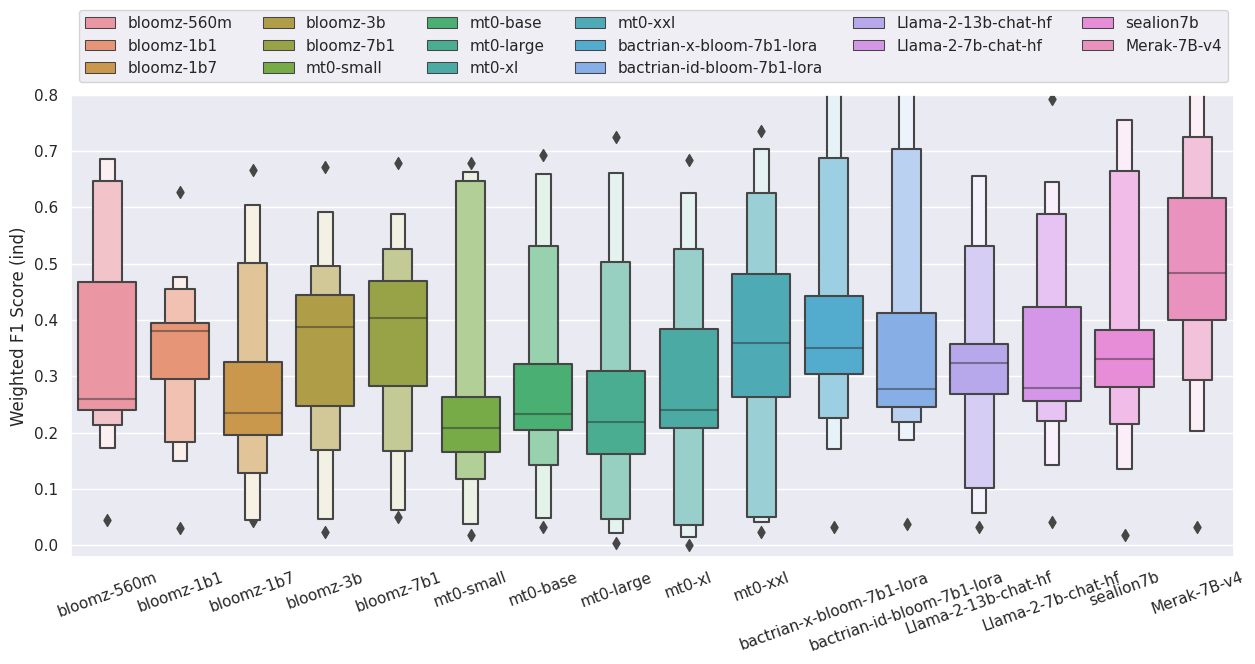

In [36]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(data=pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', k_depth=3, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.02,0.8)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

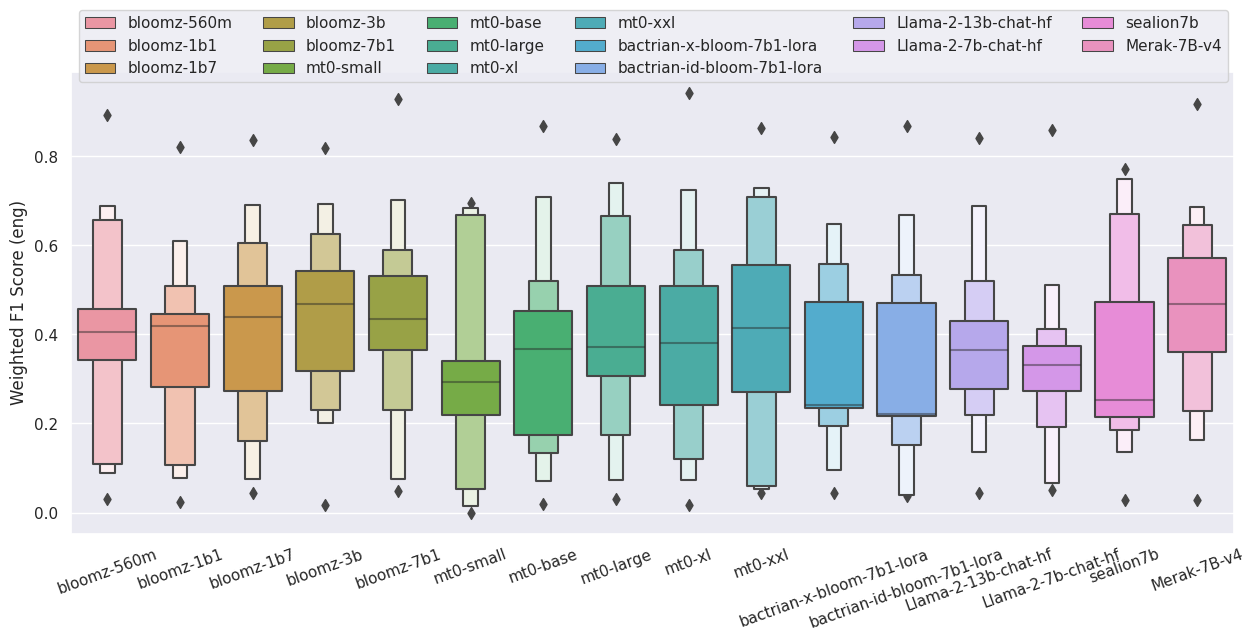

In [37]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', k_depth=3, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

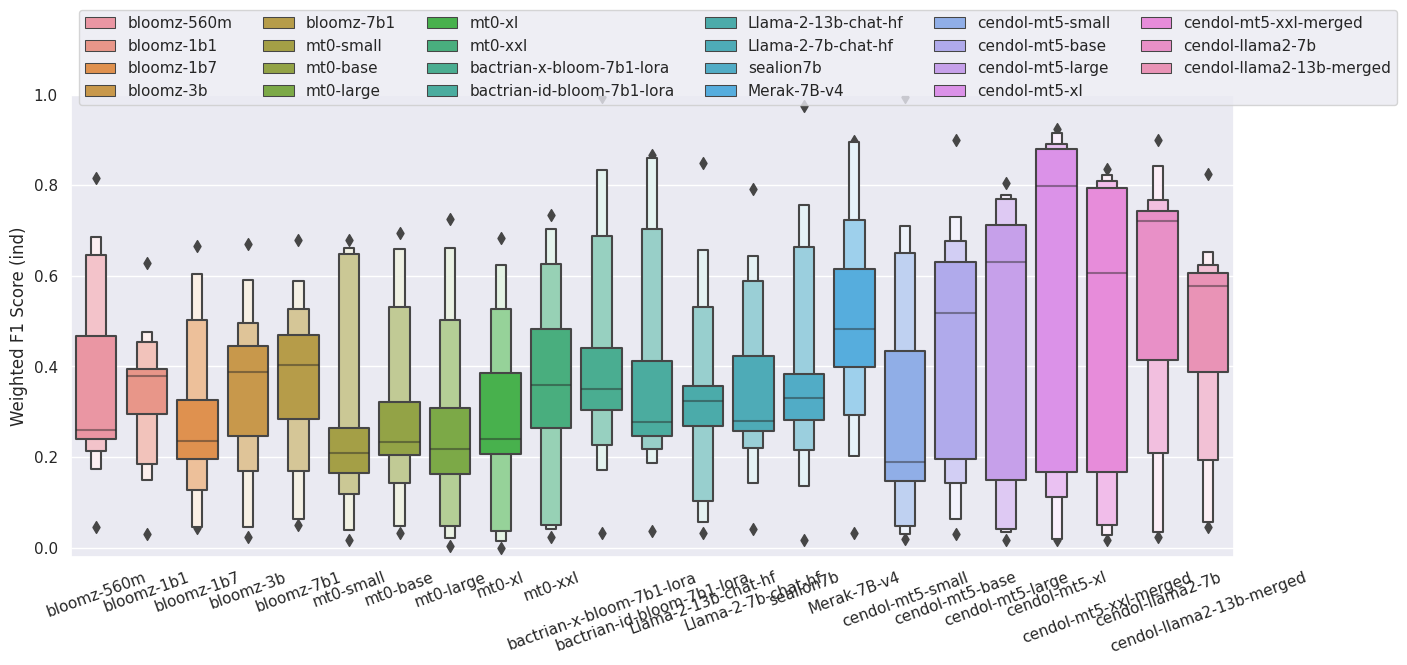

In [40]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', k_depth=3, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.02,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

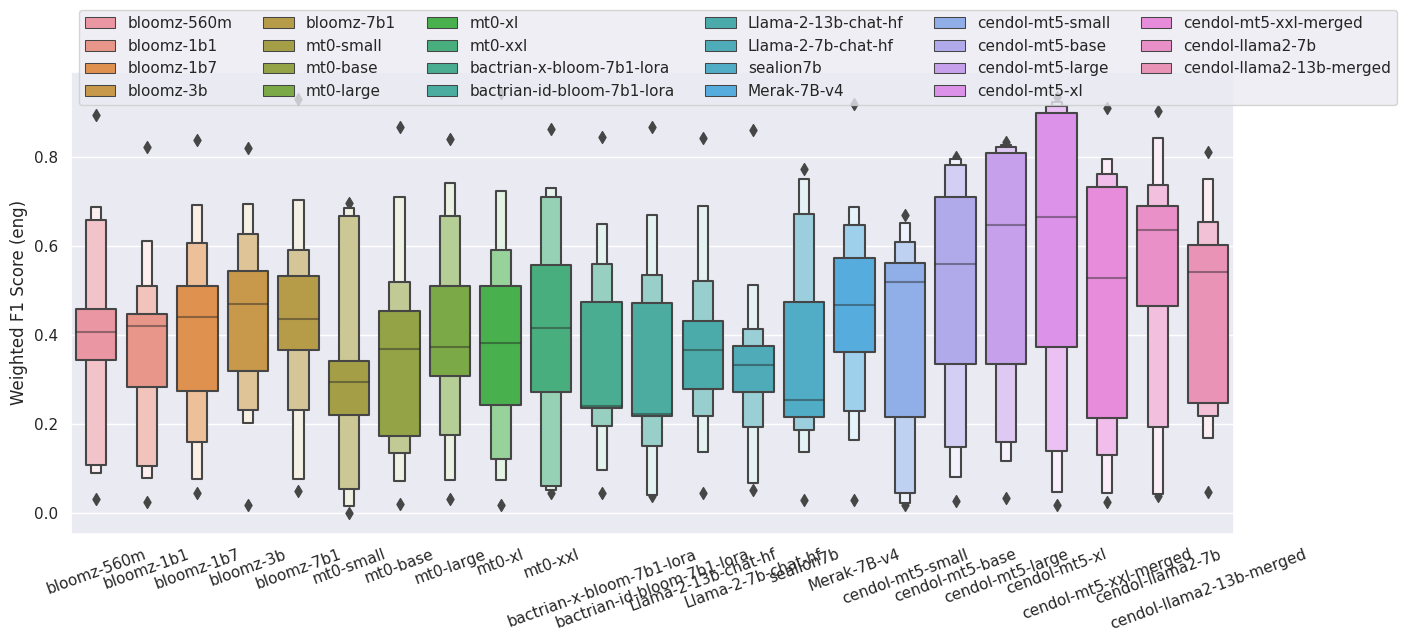

In [43]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', k_depth=3, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

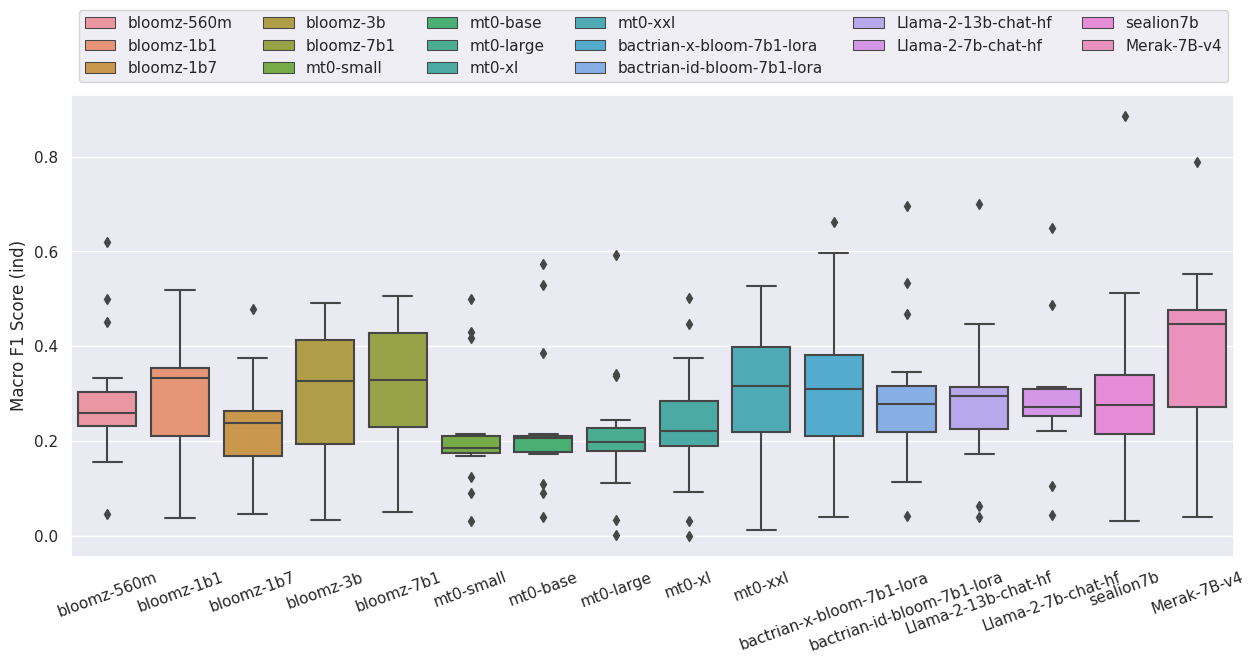

In [44]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

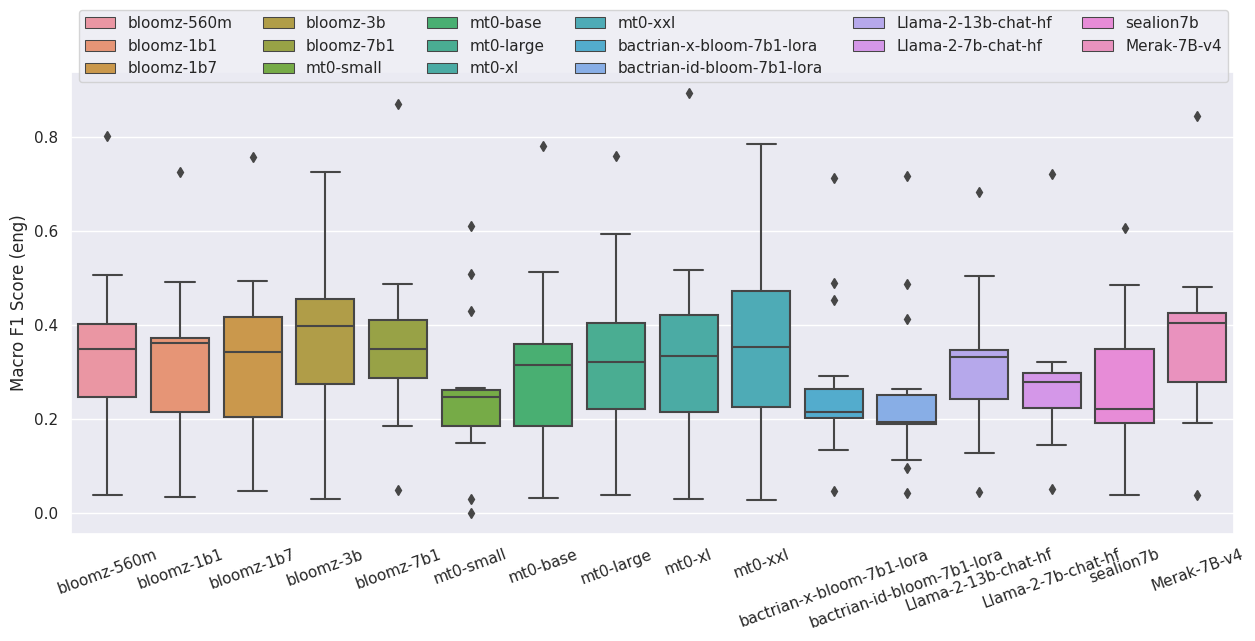

In [45]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

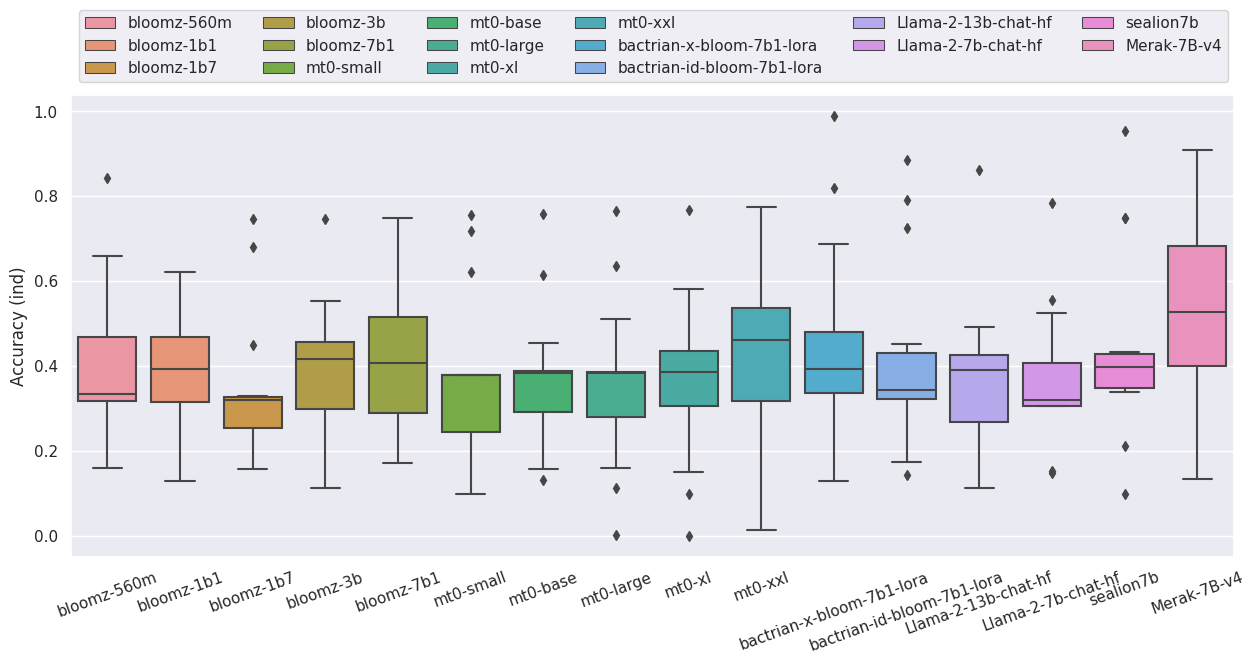

In [46]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='accuracy', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy (ind)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_ind.pdf', bbox_inches='tight')
plt.show()

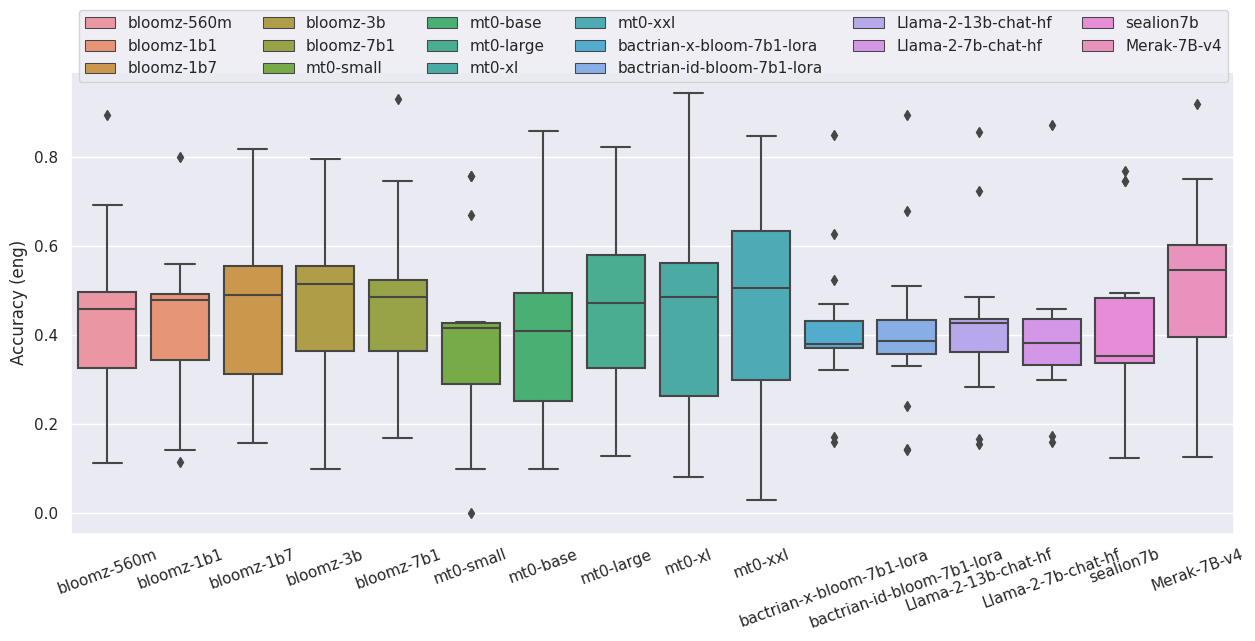

In [47]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='accuracy', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy (eng)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_eng.pdf', bbox_inches='tight')
plt.show()

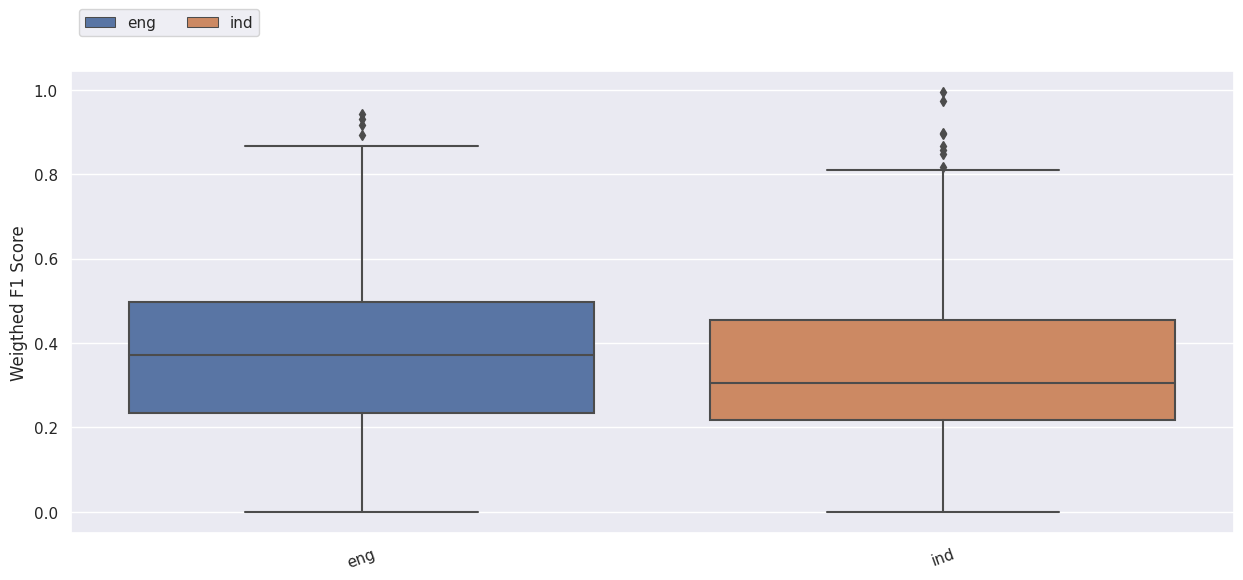

In [48]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='weighted_f1_score', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weigthed F1 Score')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_lang.pdf', bbox_inches='tight')
plt.show()

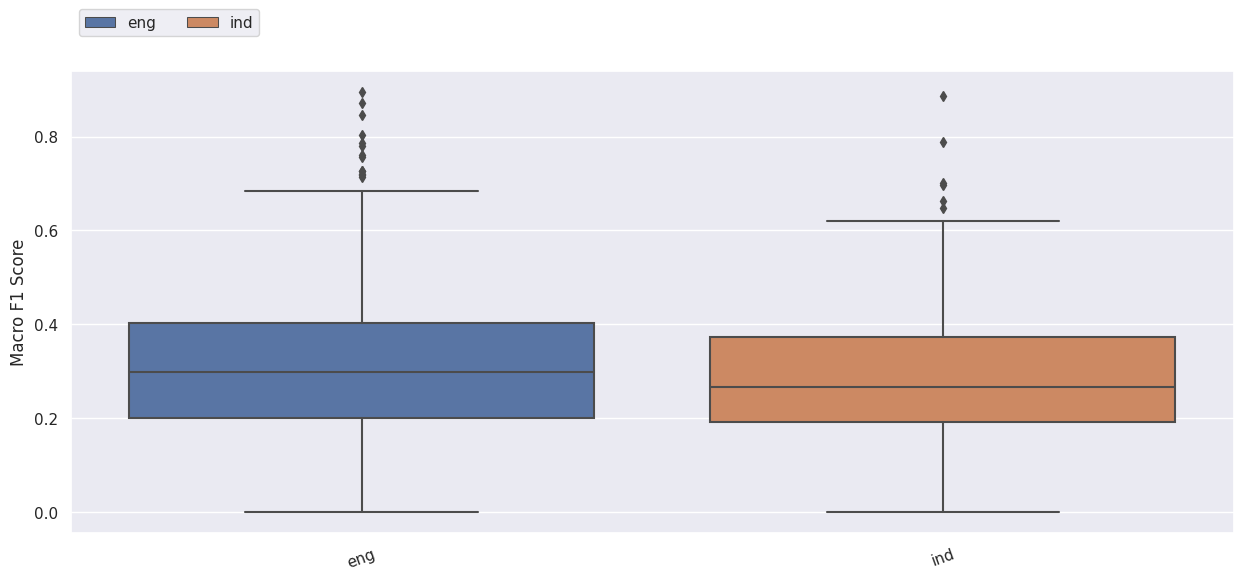

In [49]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='macro_f1_score', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_lang.pdf', bbox_inches='tight')
plt.show()

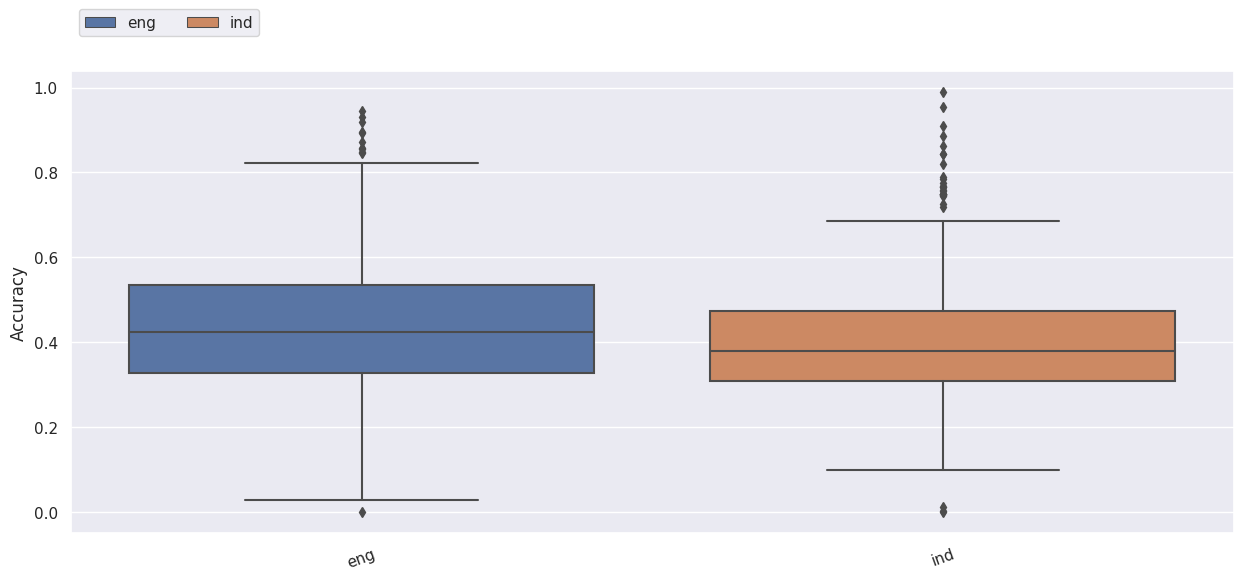

In [50]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='accuracy', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy')
plt.xlabel(None)
plt.savefig('./figures/accuracy_lang.pdf', bbox_inches='tight')
plt.show()

# Cendol Results

In [53]:
metric = 'weighted_f1_score'

### All

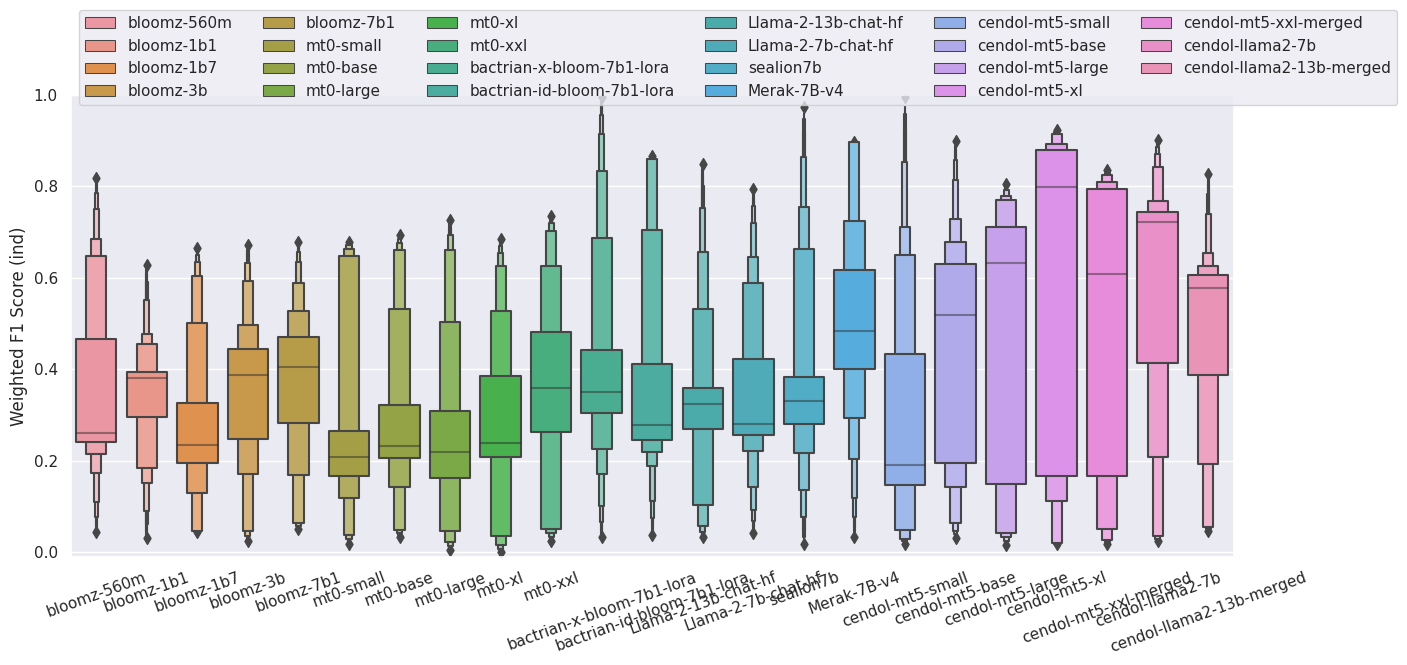

In [54]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

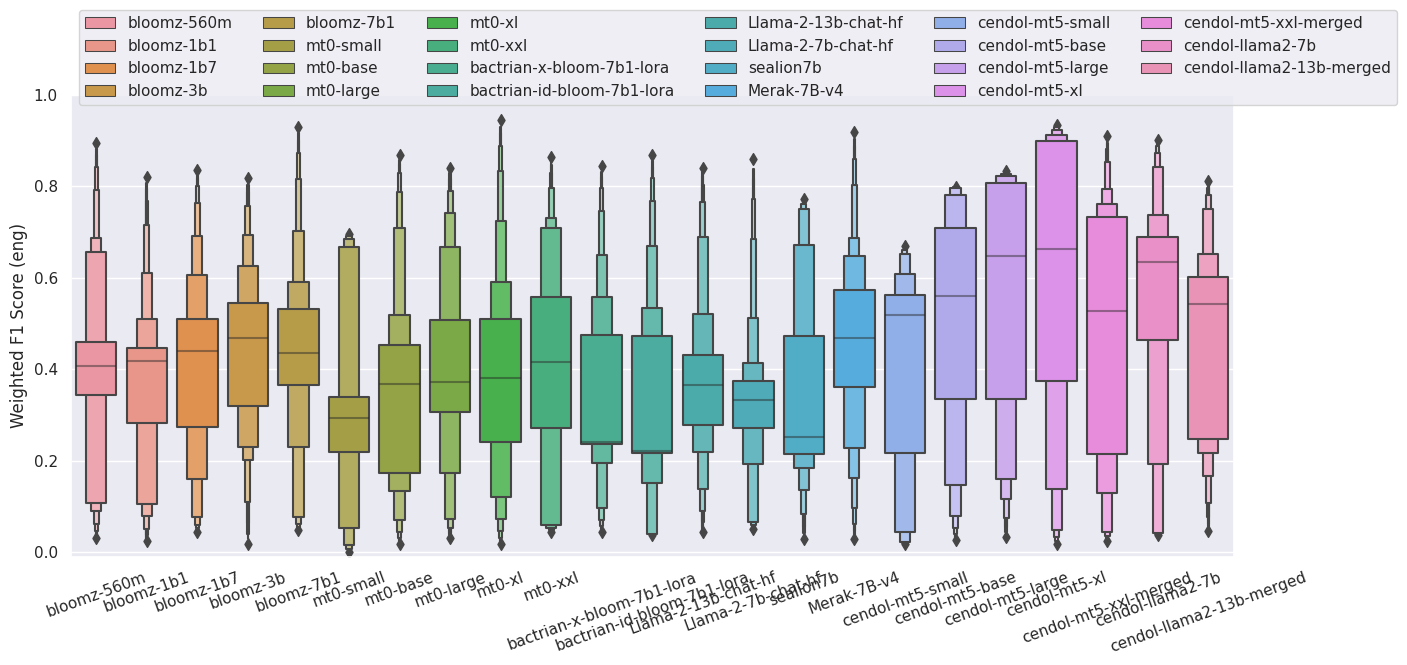

In [55]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

### No BLOOM & Bactrian

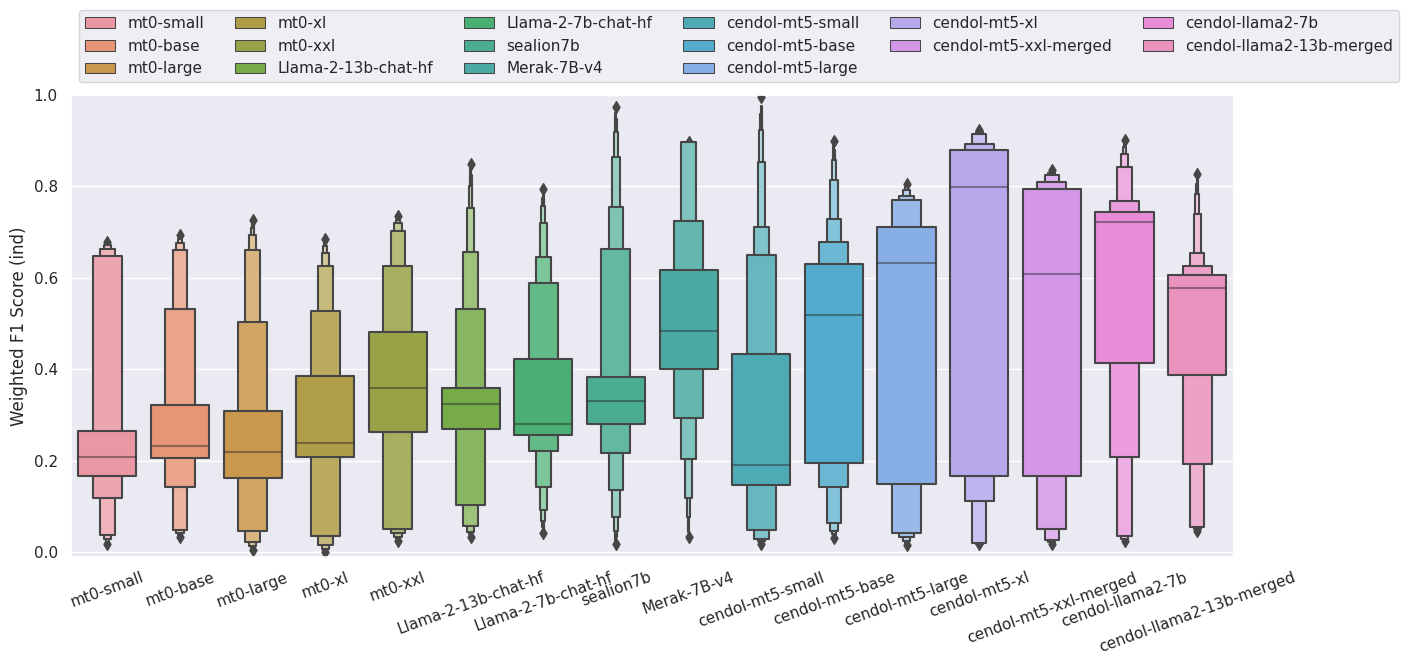

In [56]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

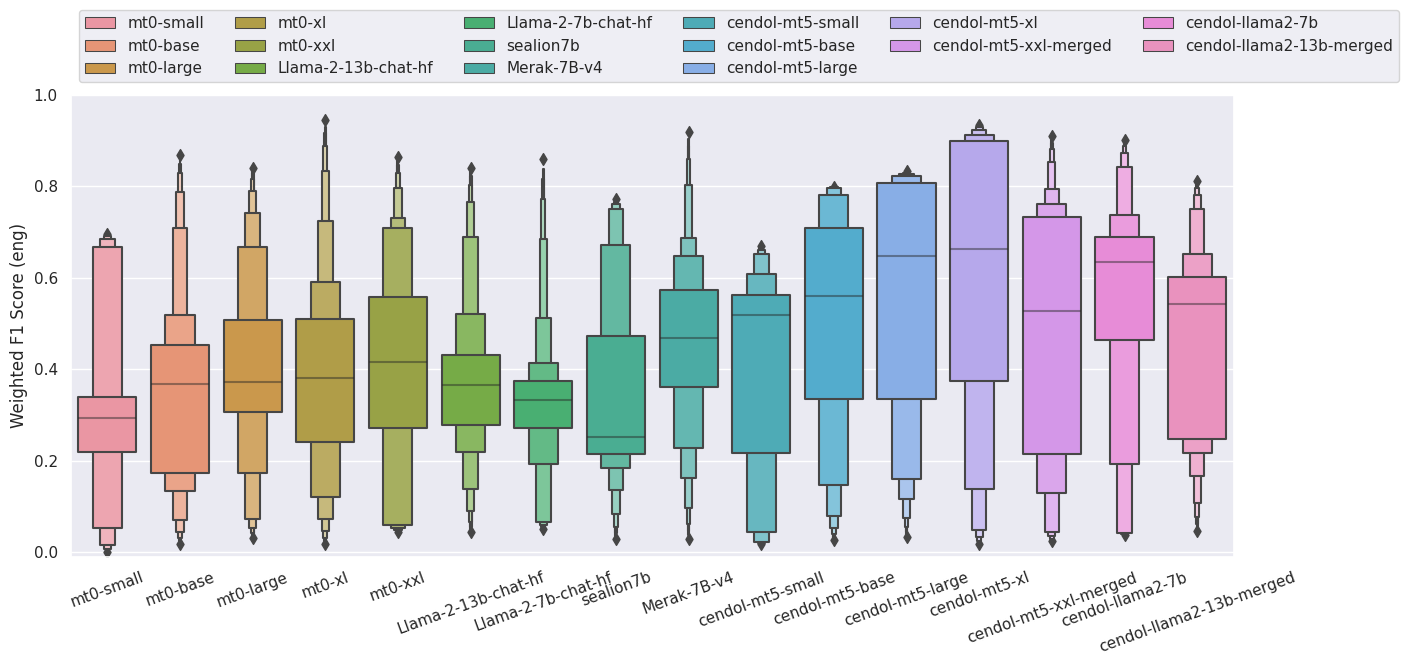

In [57]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

### mT5 Based

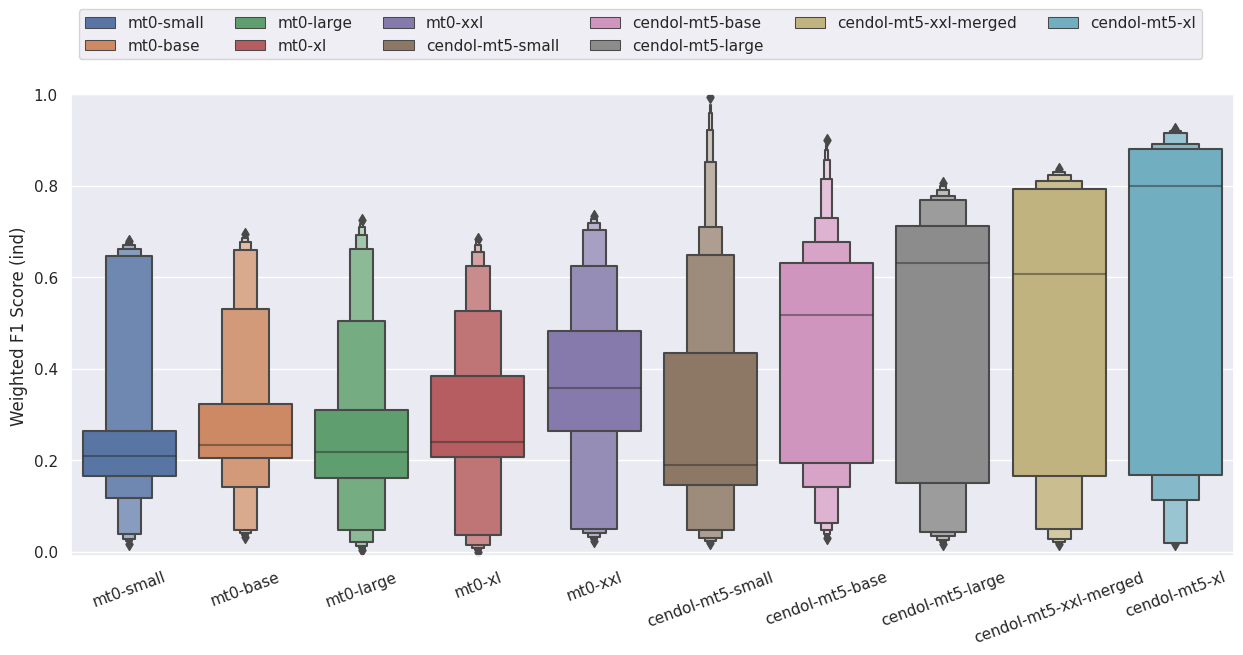

In [58]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

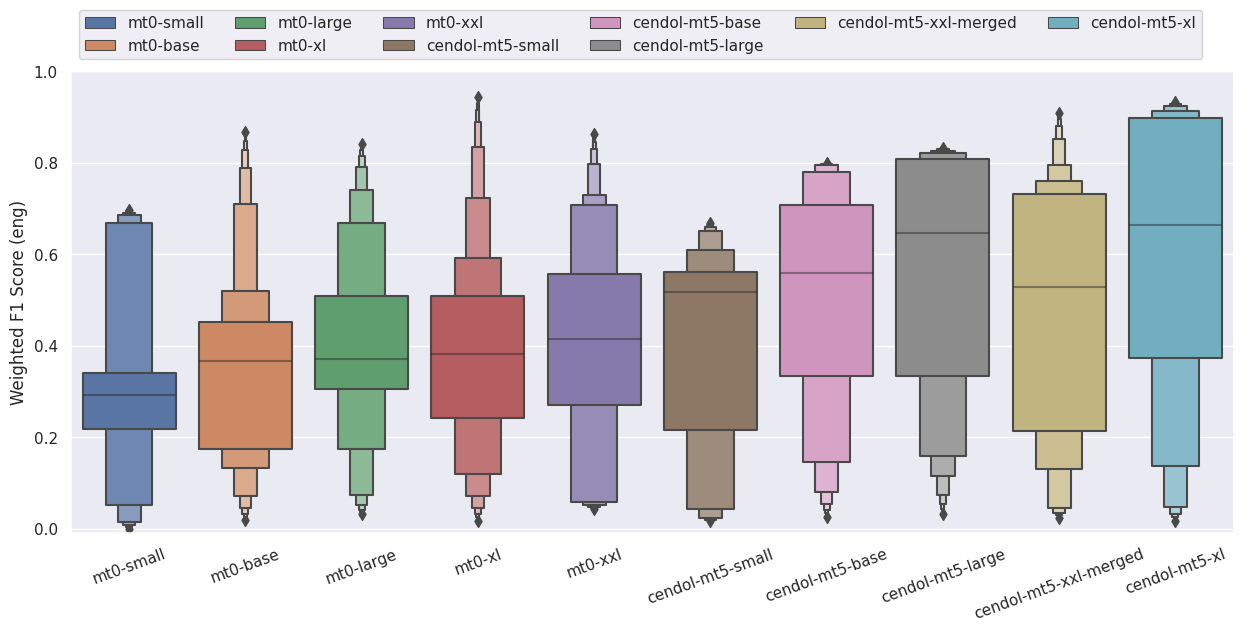

In [59]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.ylim(-0.01,1.0)
# plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

### LLaMA Based

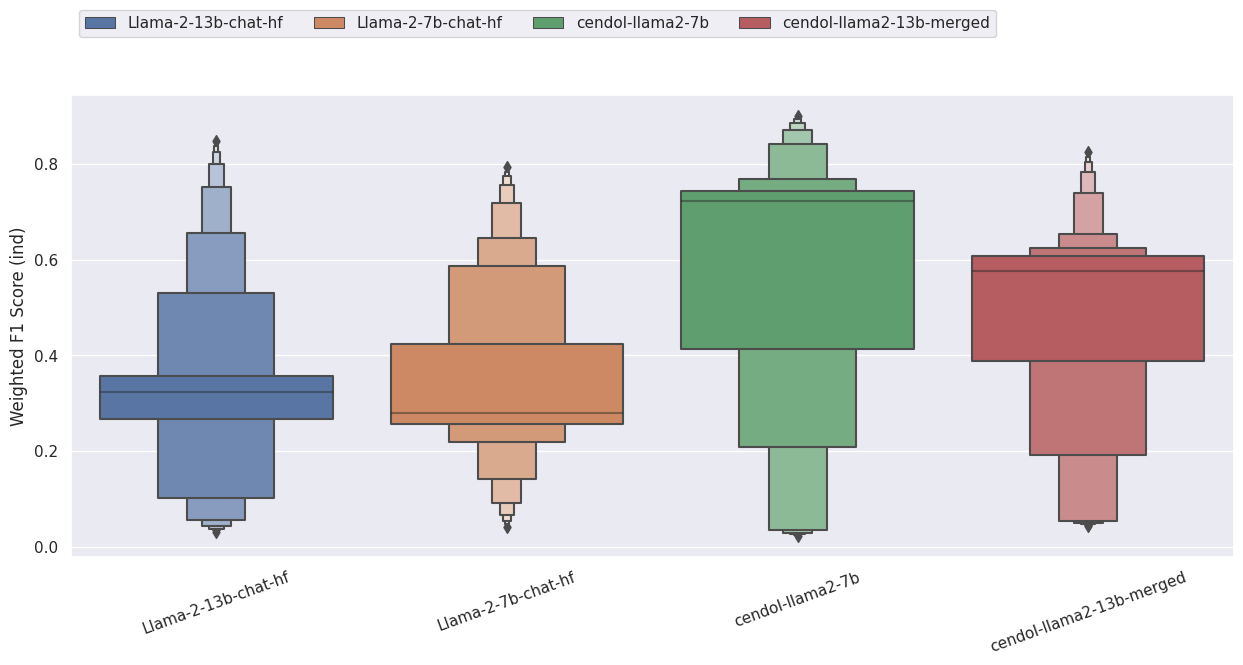

In [60]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

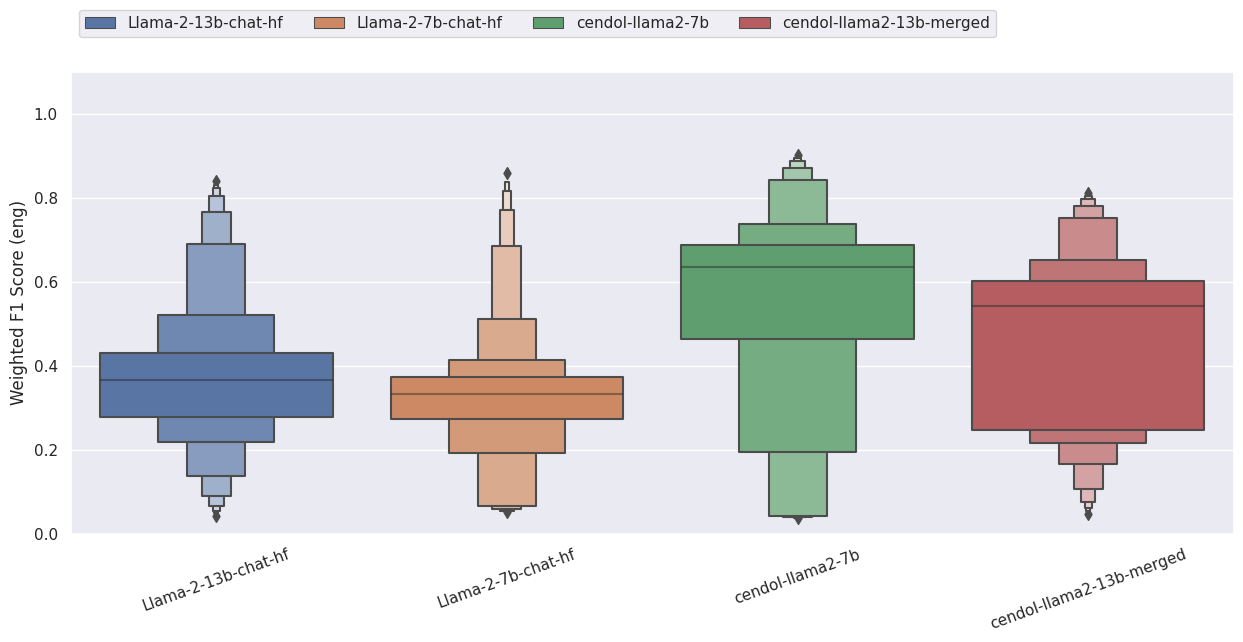

In [61]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)

plt.ylim(0.0,1.1)
# plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

### Show Eng & Ind

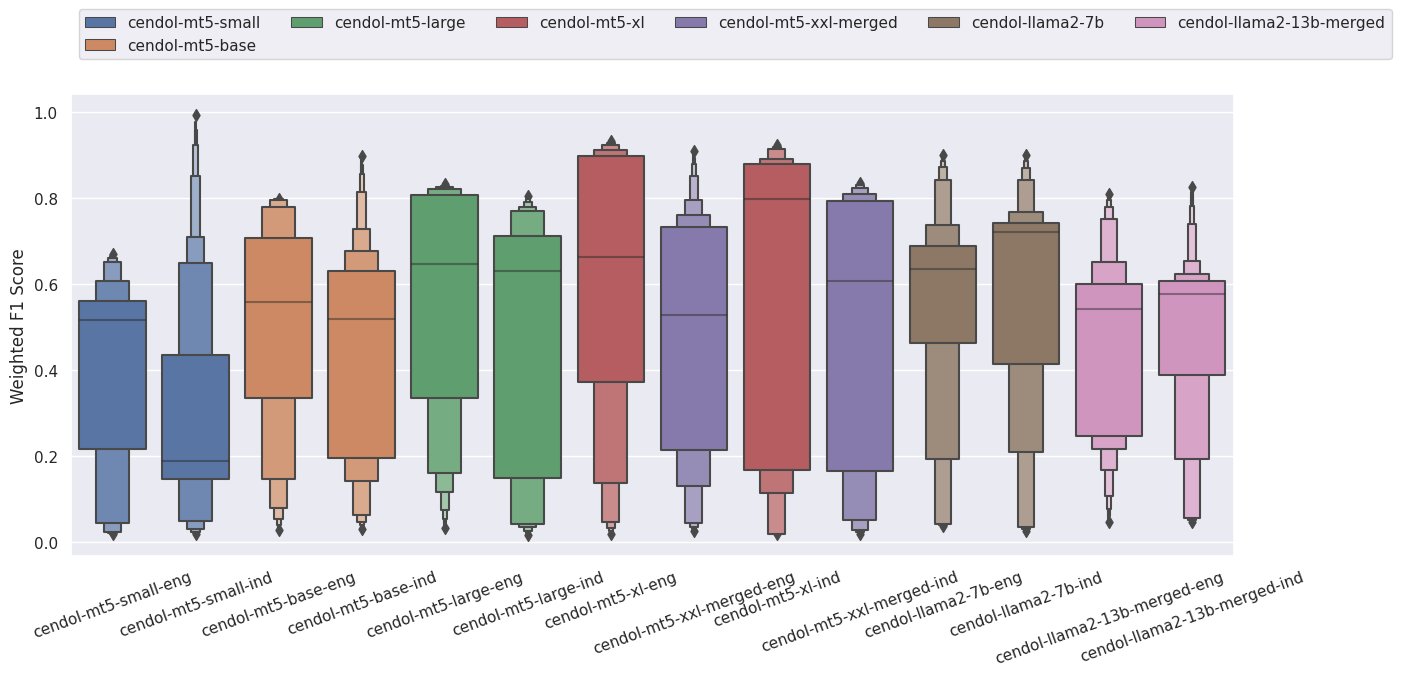

In [62]:
# Cendol Only
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id','lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

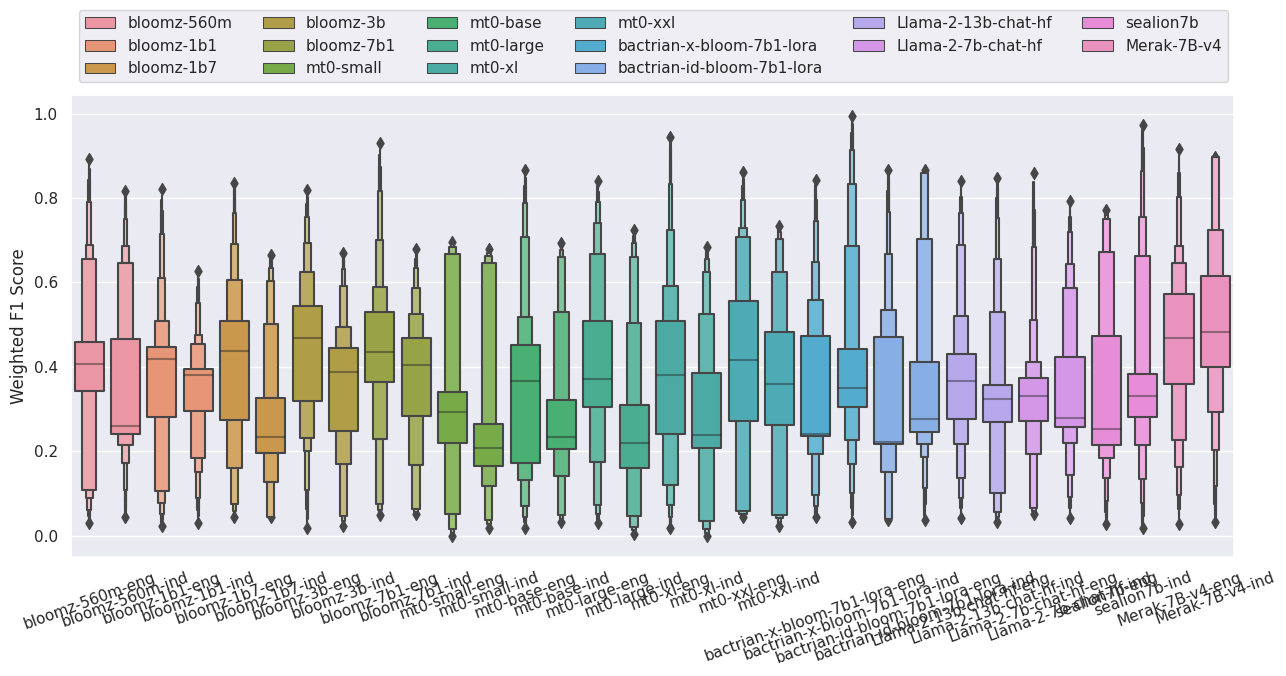

In [63]:
# Non Cendol
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id','lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

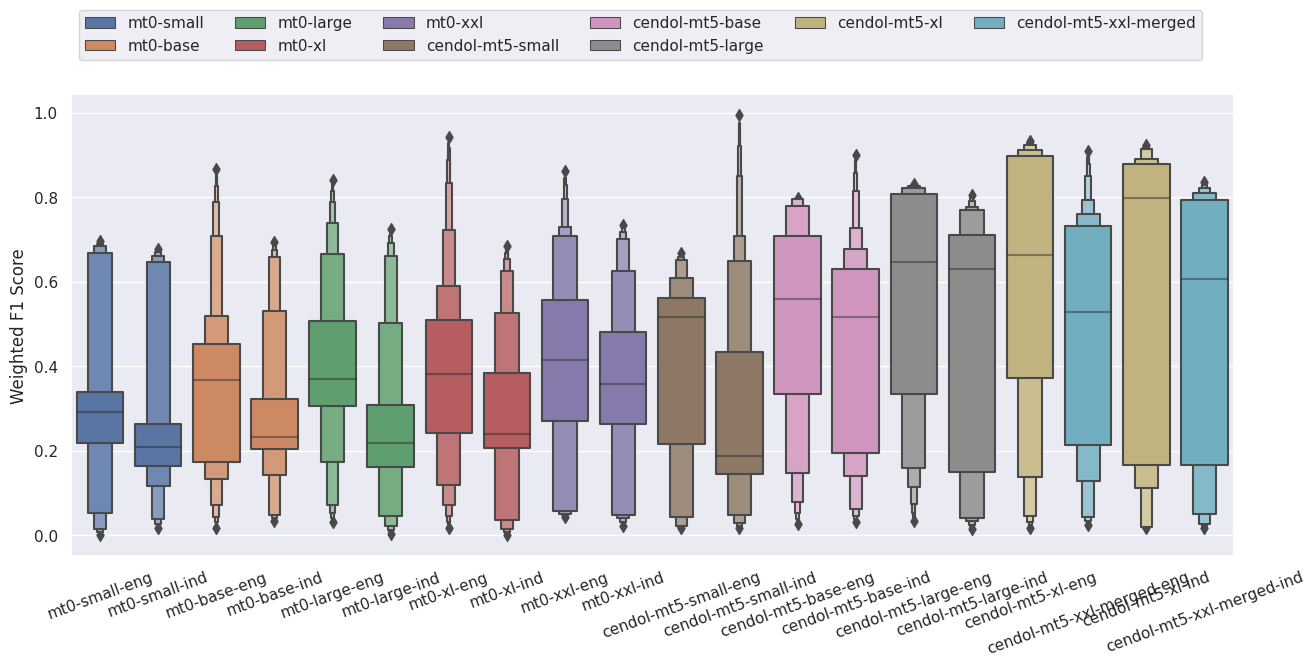

In [64]:
# mT5
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id', 'lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

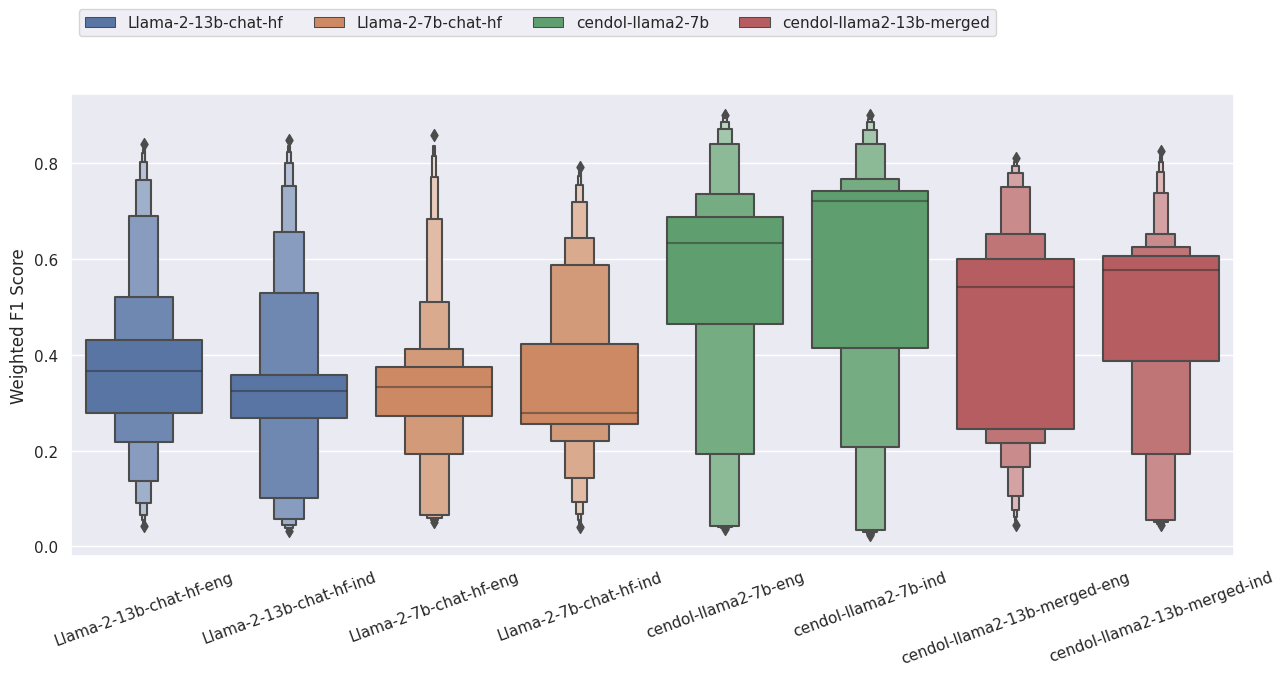

In [65]:
# LLaMA
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id', 'lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

## Insights
- Effect of Instruction-Tuned on Indonesian
  - Significantly increase the performance on target languages (Full: ~10-20%, LoRA: ~5%)
  - Reduce the gap between HRL (English) & target language instruction => Generalization of prompt language?
- LoRA
  - Performance: LoRA on largest model not as good as full fine-tuning w/ smaller models. i.e., mt5-large & mt5-xl is better than mt5-xxl-lora
  - Efficiency: While the performance of mt5-large is only as slightly higher as mt5-xxl-lora, the throughput is 3x higher

# Save

In [66]:
df.to_csv('raw_result_nlu.csv', index=False)

In [67]:
df.groupby(['model', 'lang']).size().sort_values().reset_index()

model lang   0
0          Llama-2-13b-chat-hf  eng  75
1              cendol-mt5-base  ind  75
2             cendol-mt5-large  eng  75
3             cendol-mt5-large  ind  75
4             cendol-mt5-small  eng  75
5             cendol-mt5-small  ind  75
6                cendol-mt5-xl  eng  75
7                cendol-mt5-xl  ind  75
8        cendol-mt5-xxl-merged  eng  75
9        cendol-mt5-xxl-merged  ind  75
10                    mt0-base  eng  75
11                    mt0-base  ind  75
12                   mt0-large  eng  75
13                   mt0-large  ind  75
14                   mt0-small  eng  75
15                   mt0-small  ind  75
16                      mt0-xl  eng  75
17                      mt0-xl  ind  75
18                     mt0-xxl  eng  75
19                     mt0-xxl  ind  75
20             cendol-mt5-base  eng  75
21            cendol-llama2-7b  ind  75
22            cendol-llama2-7b  eng  75
23    cendol-llama2-13b-merged  ind  75
24         Llama-2-13b-chat-hf  ind  75
25          Llama-2-7b-chat-hf  eng  75
26          Llama-2-7b-chat-hf  ind  75
27                 Merak-7B-v4  eng  75
28                 Merak-7B-v4  ind  75
29  bactrian-id-bloom-7b1-lora  eng  75
30  bactrian-id-bloom-7b1-lora  ind  75
31   bactrian-x-bloom-7b1-lora  eng  75
32   bactrian-x-bloom-7b1-lora  ind  75
33                   sealion7b  eng  75
34                  bloomz-1b1  eng  75
35                  bloomz-1b7  eng  75
36                  bloomz-1b7  ind  75
37                   bloomz-3b  eng  75
38                   bloomz-3b  ind  75
39                 bloomz-560m  eng  75
40                 bloomz-560m  ind  75
41                  bloomz-7b1  eng  75
42                  bloomz-7b1  ind  75
43    cendol-llama2-13b-merged  eng  75
44                  bloomz-1b1  ind  75
45                   sealion7b  ind  75

# NLG

In [68]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)
df = df[df['dataset'] != 'xpersona_id_nusantara_t2t']

In [69]:
df[df['model'].str.contains('cendol')].to_csv('combine_nlg.csv')

In [70]:
df[(df['lang'] == 'ind')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

SacreBLEU     ROUGE1     ROUGE2     ROUGEL  \
model                      lang                                               
Llama-2-13b-chat-hf        ind    3.491855  17.408252   6.397490  16.070944   
Llama-2-7b-chat-hf         ind    2.855489  14.940335   5.464974  13.984853   
bactrian-id-bloom-7b1-lora ind    2.512010  14.968249   4.749311  13.523019   
bactrian-x-bloom-7b1-lora  ind    1.043114   9.106870   2.397877   8.151451   
bloomz-1b1                 ind    3.687485  14.283274   4.299907  13.150481   
bloomz-1b7                 ind    4.278578  13.089773   4.583733  12.221784   
bloomz-3b                  ind    5.823659  17.926600   6.533066  16.704965   
bloomz-560m                ind    3.817210  12.809180   4.154453  12.048300   
bloomz-7b1                 ind    7.019796  20.110615   7.826098  18.743148   
cendol-llama2-13b-merged   ind   33.848020  51.848793  36.149264  50.726769   
cendol-llama2-7b           ind   41.485630  56.776622  43.432977  55.691589   
cendol-mt5-base            ind   26.064014  45.195532  27.959840  44.133234   
cendol-mt5-large           ind   32.914996  51.288489  35.150283  50.242232   
cendol-mt5-small           ind   17.465740  36.581614  19.169956  35.672951   
cendol-mt5-xl              ind   42.862172  58.613304  45.405643  57.604644   
cendol-mt5-xxl-merged      ind   26.810610  47.335898  29.200322  46.271183   
mt0-base                   ind    6.380389  21.025819   7.390862  19.798904   
mt0-large                  ind    7.448810  22.132994   8.529370  20.826814   
mt0-small                  ind    3.991534  15.234907   4.783852  14.329162   
mt0-xl                     ind   10.819873  27.613863  12.363183  26.313243   
mt0-xxl                    ind   13.608290  31.086820  15.723019  29.855405   
sealion7b                  ind    0.662736   6.650025   1.315338   5.602145   

                                    chrF++  
model                      lang             
Llama-2-13b-chat-hf        ind   31.748986  
Llama-2-7b-chat-hf         ind   29.982405  
bactrian-id-bloom-7b1-lora ind   26.941885  
bactrian-x-bloom-7b1-lora  ind   22.771275  
bloomz-1b1                 ind   23.435741  
bloomz-1b7                 ind   21.904319  
bloomz-3b                  ind   26.202500  
bloomz-560m                ind   21.579013  
bloomz-7b1                 ind   28.005185  
cendol-llama2-13b-merged   ind   55.954605  
cendol-llama2-7b           ind   61.542530  
cendol-mt5-base            ind   50.058641  
cendol-mt5-large           ind   55.248486  
cendol-mt5-small           ind   42.701919  
cendol-mt5-xl              ind   61.800679  
cendol-mt5-xxl-merged      ind   52.078779  
mt0-base                   ind   29.626949  
mt0-large                  ind   29.573464  
mt0-small                  ind   24.716269  
mt0-xl                     ind   34.950330  
mt0-xxl                    ind   37.417450  
sealion7b                  ind   23.182151

In [71]:
df[(df['lang'] == 'eng')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

SacreBLEU     ROUGE1     ROUGE2     ROUGEL  \
model                      lang                                               
Llama-2-13b-chat-hf        eng    1.831031   9.172567   3.244235   8.687830   
Llama-2-7b-chat-hf         eng    1.911577  10.150166   3.578563   9.771467   
bactrian-id-bloom-7b1-lora eng    1.828950  10.260876   3.261739   9.552469   
bactrian-x-bloom-7b1-lora  eng    0.814679   6.063270   1.687972   5.596476   
bloomz-1b1                 eng    4.145185  15.850170   4.941602  14.548177   
bloomz-1b7                 eng    6.753898  19.686551   7.411420  18.570691   
bloomz-3b                  eng    7.022884  19.892330   7.662295  18.663869   
bloomz-560m                eng    5.236633  17.227899   5.807683  15.980704   
bloomz-7b1                 eng    7.337698  20.879080   8.201724  19.575324   
cendol-llama2-13b-merged   eng   30.814338  49.052079  33.171221  47.988251   
cendol-llama2-7b           eng   39.823541  54.559973  41.137542  53.523433   
cendol-mt5-base            eng   18.788503  35.548259  20.652812  34.648398   
cendol-mt5-large           eng   24.289738  42.243787  26.410745  41.353208   
cendol-mt5-small           eng   14.443251  33.172070  16.551661  32.233677   
cendol-mt5-xl              eng   30.468621  45.853537  32.091071  44.980825   
cendol-mt5-xxl-merged      eng   23.492000  43.360847  25.623388  42.363628   
mt0-base                   eng    5.804004  19.034728   6.602516  17.902344   
mt0-large                  eng    7.224409  21.611695   8.232855  20.354043   
mt0-small                  eng    4.609297  16.922002   5.378454  15.991750   
mt0-xl                     eng    9.809450  25.627877  10.949825  24.302098   
mt0-xxl                    eng   13.544988  30.190565  15.489147  29.006695   
sealion7b                  eng    0.415413   3.453613   0.761501   3.073140   

                                    chrF++  
model                      lang             
Llama-2-13b-chat-hf        eng   24.844185  
Llama-2-7b-chat-hf         eng   25.572762  
bactrian-id-bloom-7b1-lora eng   22.647129  
bactrian-x-bloom-7b1-lora  eng   20.157295  
bloomz-1b1                 eng   24.360352  
bloomz-1b7                 eng   28.959221  
bloomz-3b                  eng   28.368598  
bloomz-560m                eng   26.629871  
bloomz-7b1                 eng   29.341248  
cendol-llama2-13b-merged   eng   53.668486  
cendol-llama2-7b           eng   59.444945  
cendol-mt5-base            eng   44.209466  
cendol-mt5-large           eng   49.571138  
cendol-mt5-small           eng   42.161427  
cendol-mt5-xl              eng   52.492621  
cendol-mt5-xxl-merged      eng   49.294264  
mt0-base                   eng   27.484624  
mt0-large                  eng   28.899203  
mt0-small                  eng   26.126227  
mt0-xl                     eng   33.599806  
mt0-xxl                    eng   36.788167  
sealion7b                  eng   19.885037

# STIF

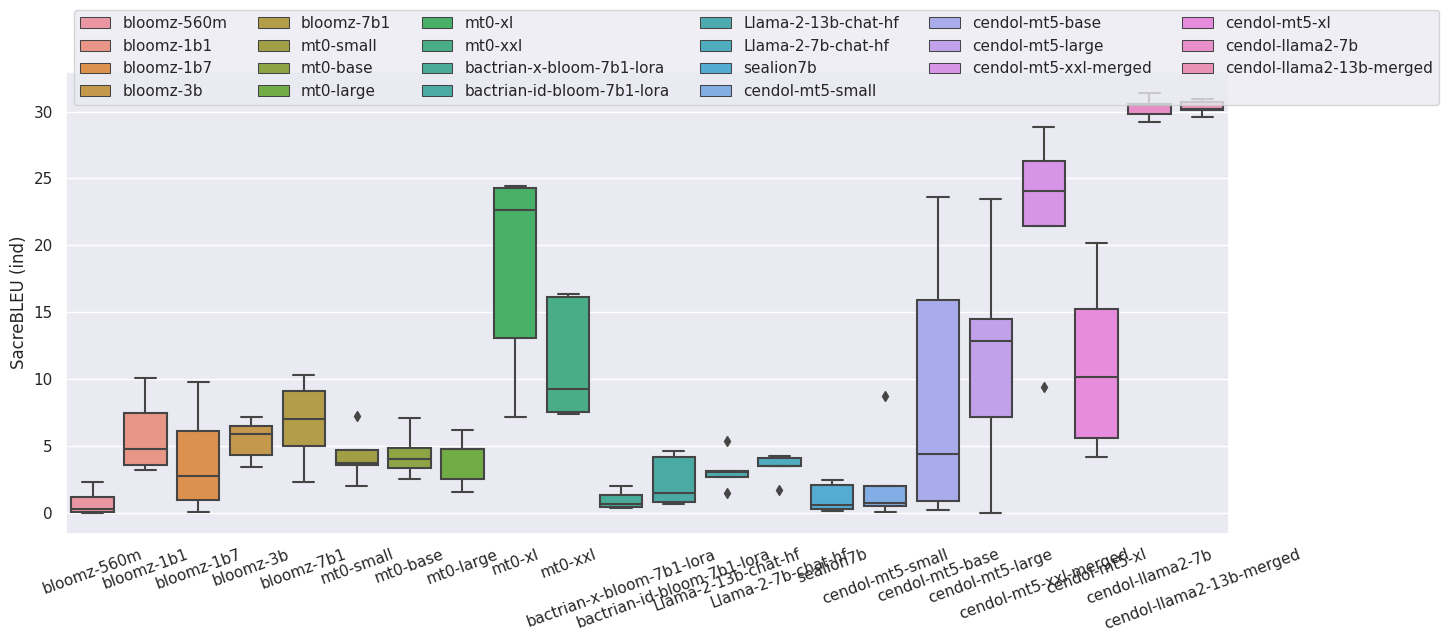

In [72]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'] == 'stif_indonesia_nusantara_t2t') & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_stif_ind.pdf', bbox_inches='tight')
plt.show()

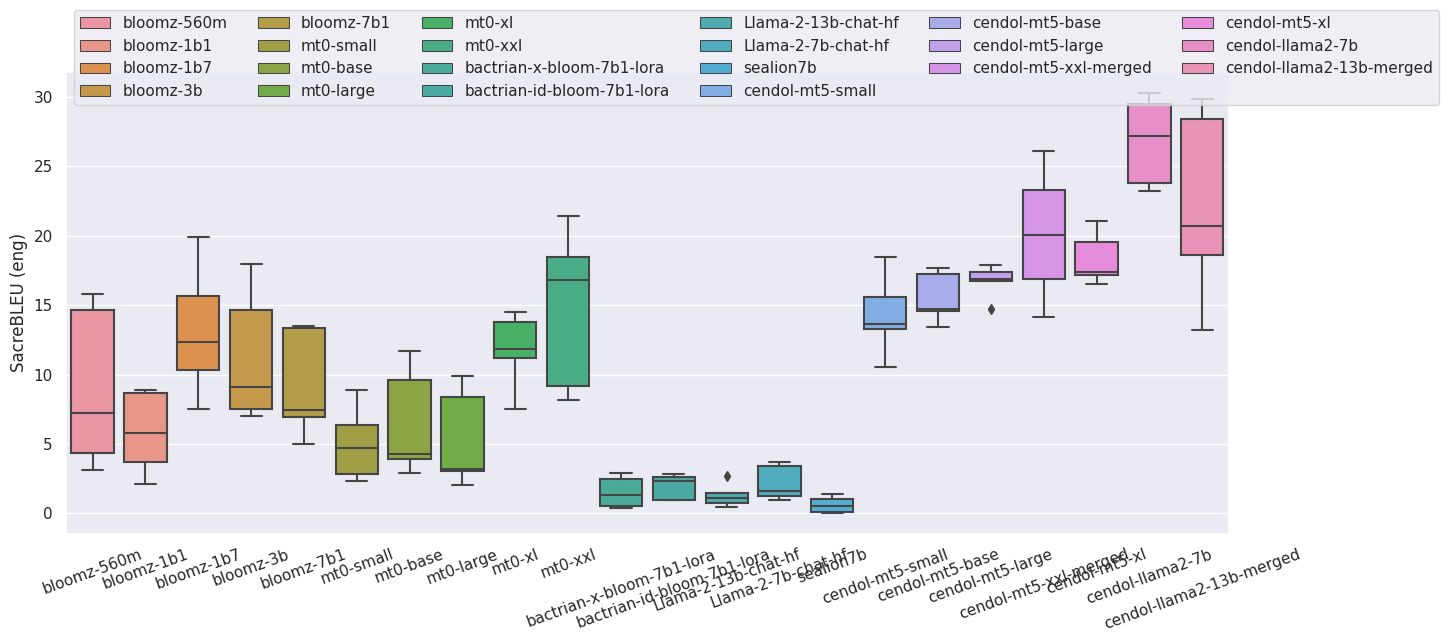

In [73]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'] == 'stif_indonesia_nusantara_t2t') & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_stif_eng.pdf', bbox_inches='tight')
plt.show()

# MT Directional

### To Ind

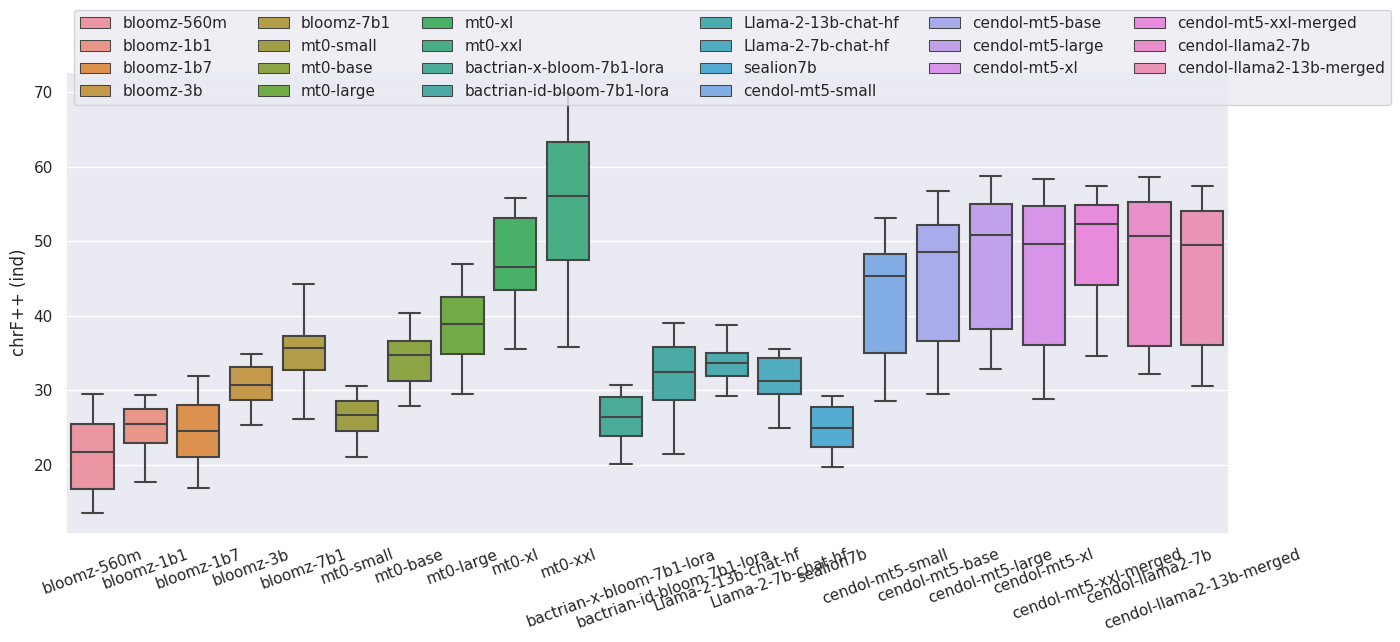

In [81]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_Latn')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

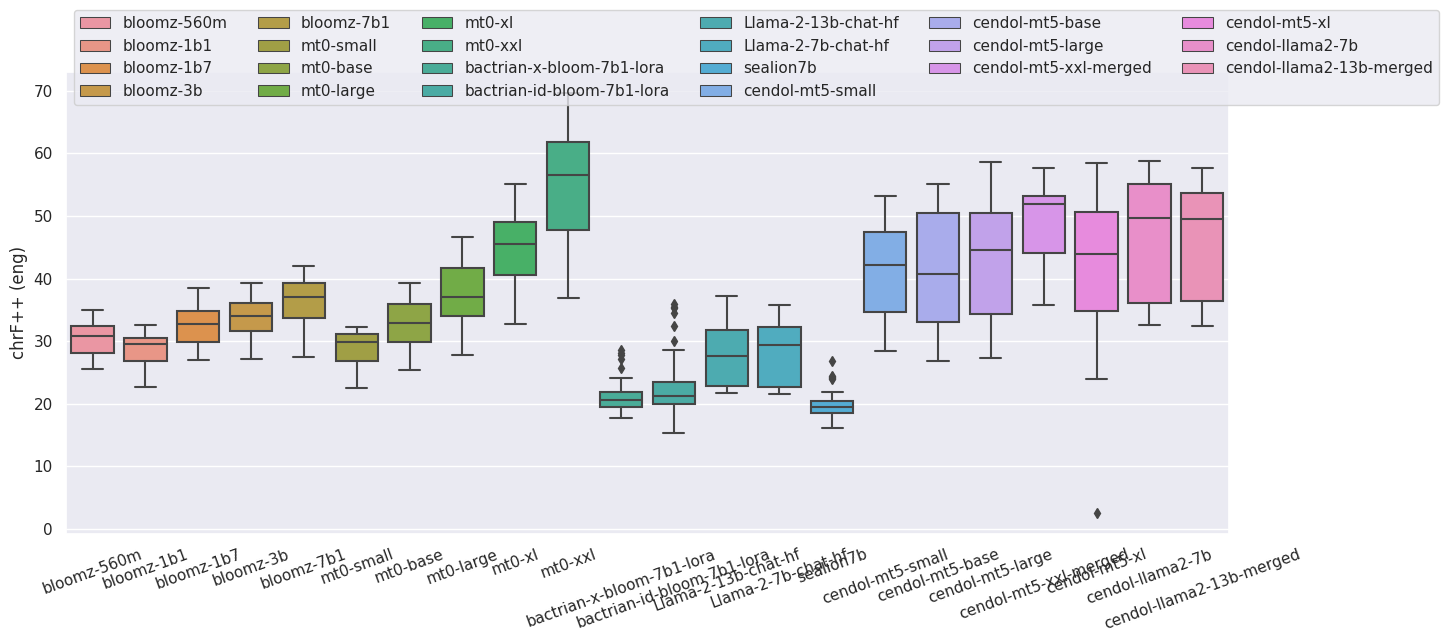

In [82]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_Latn')) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (eng)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

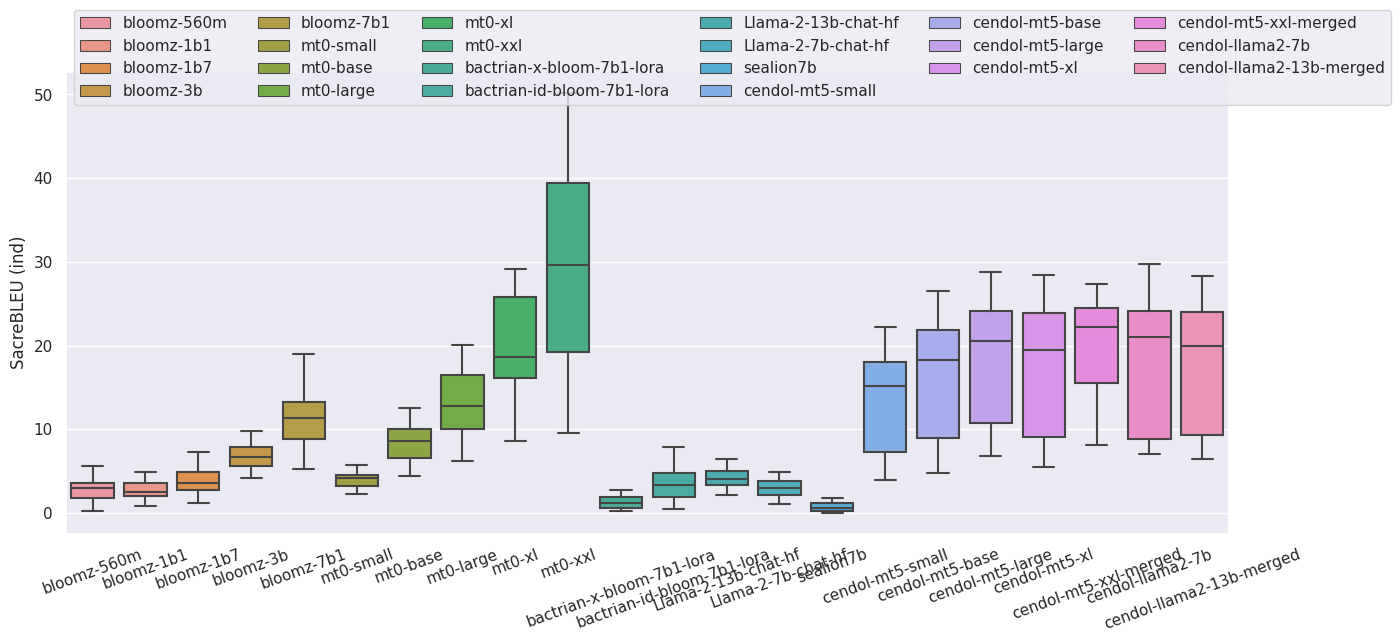

In [83]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_Latn')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

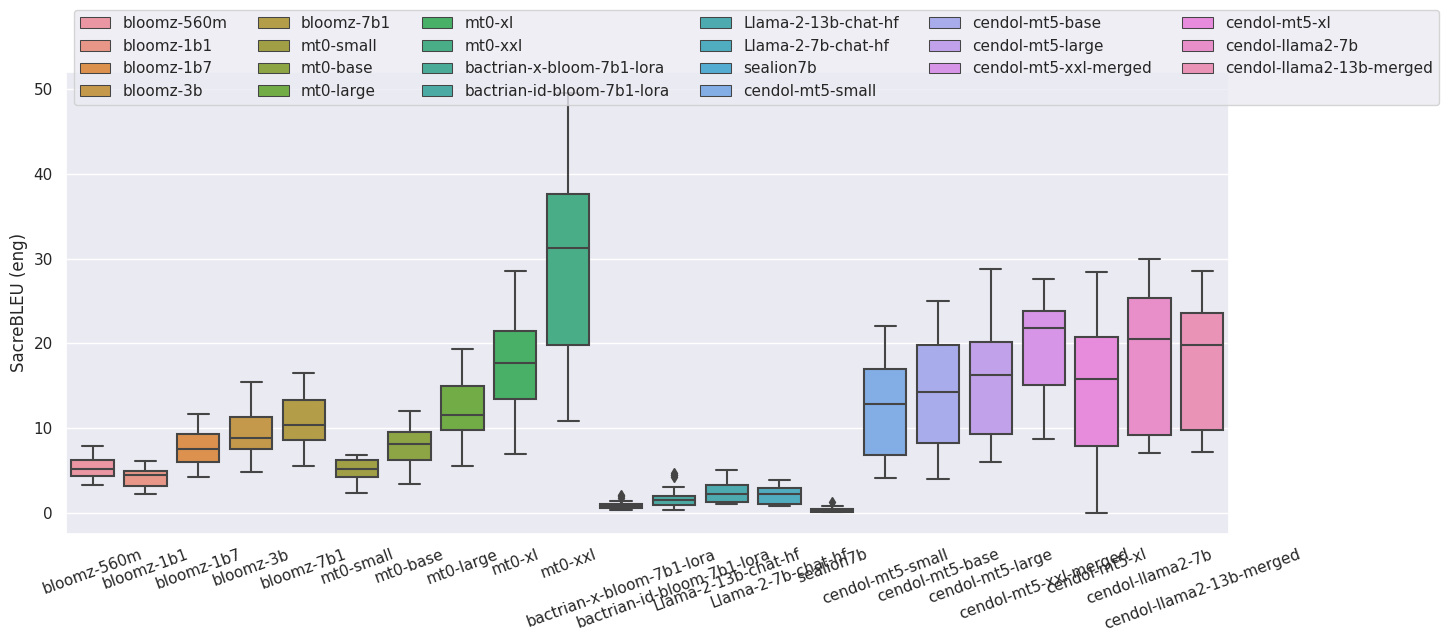

In [84]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_Latn')) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

### From Ind

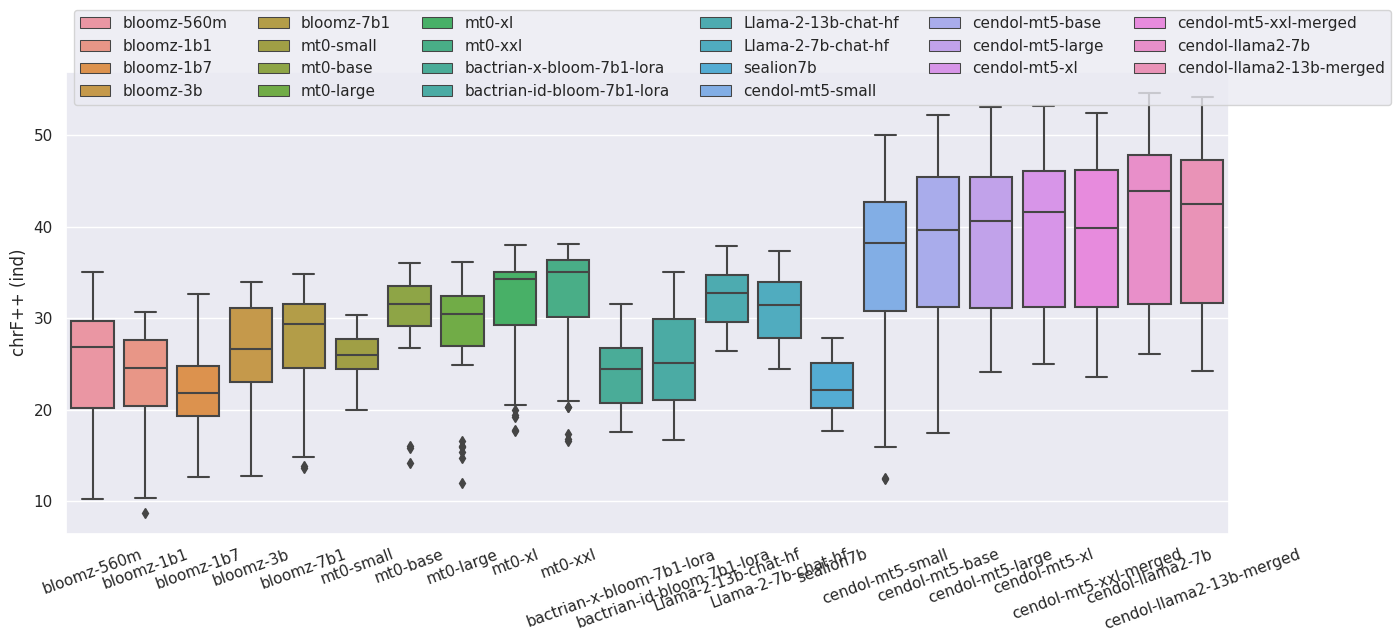

In [85]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.contains('-ind_Latn-')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

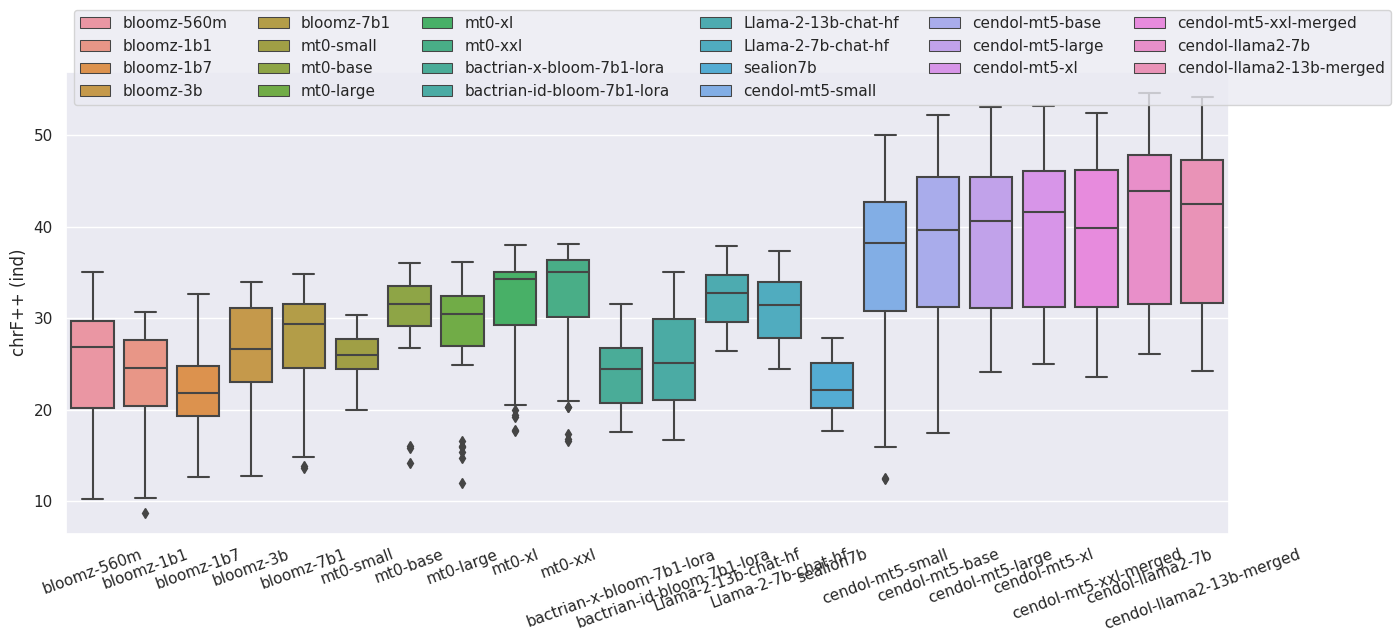

In [86]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.contains('-ind_Latn-')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

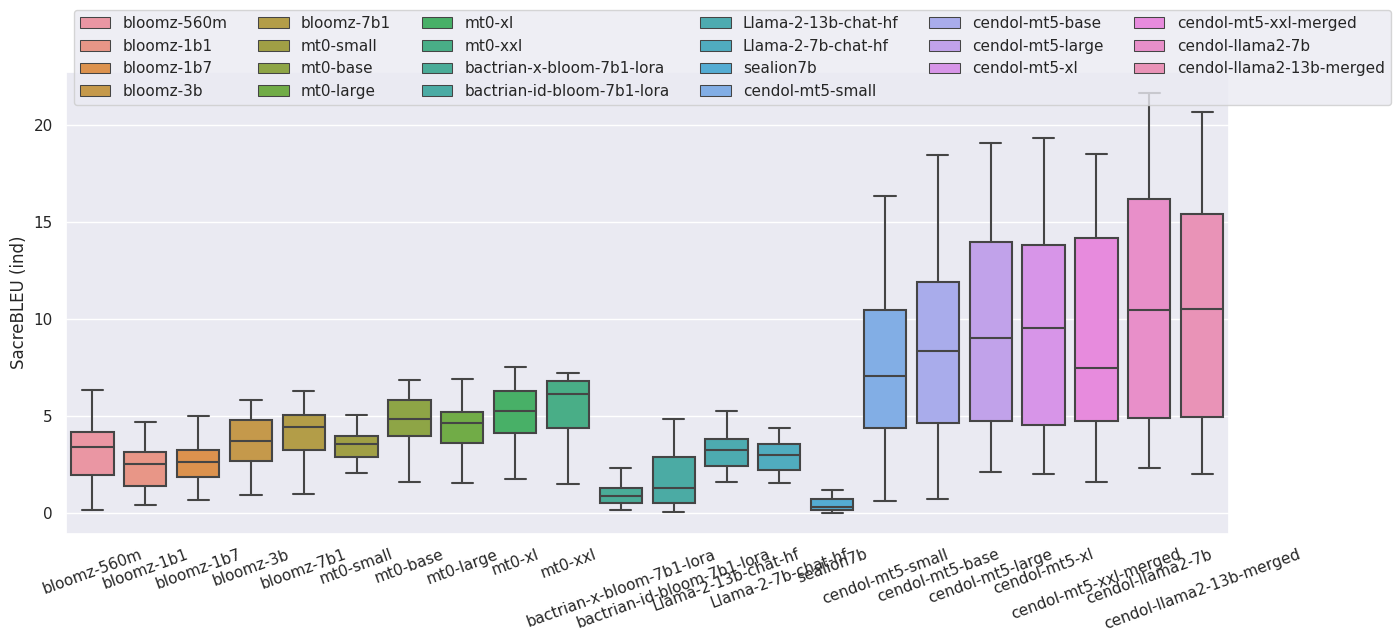

In [87]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.contains('-ind_Latn-')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

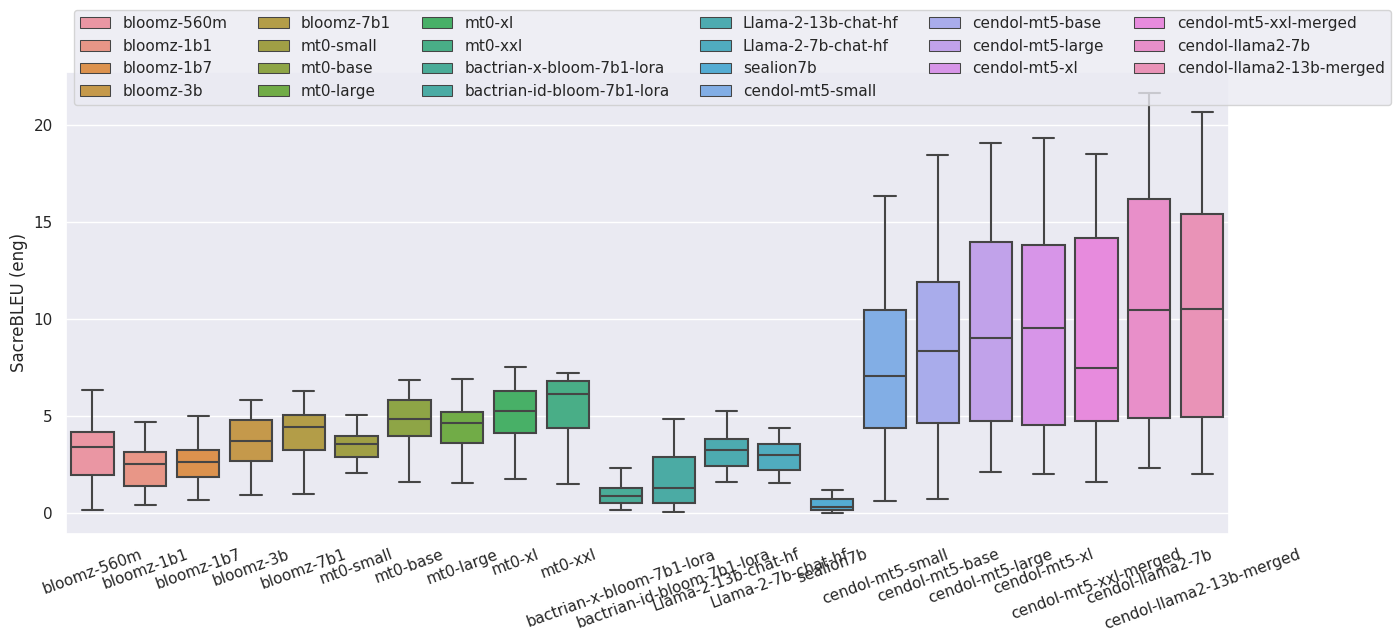

In [88]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.contains('-ind_Latn-')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

## TydiQA

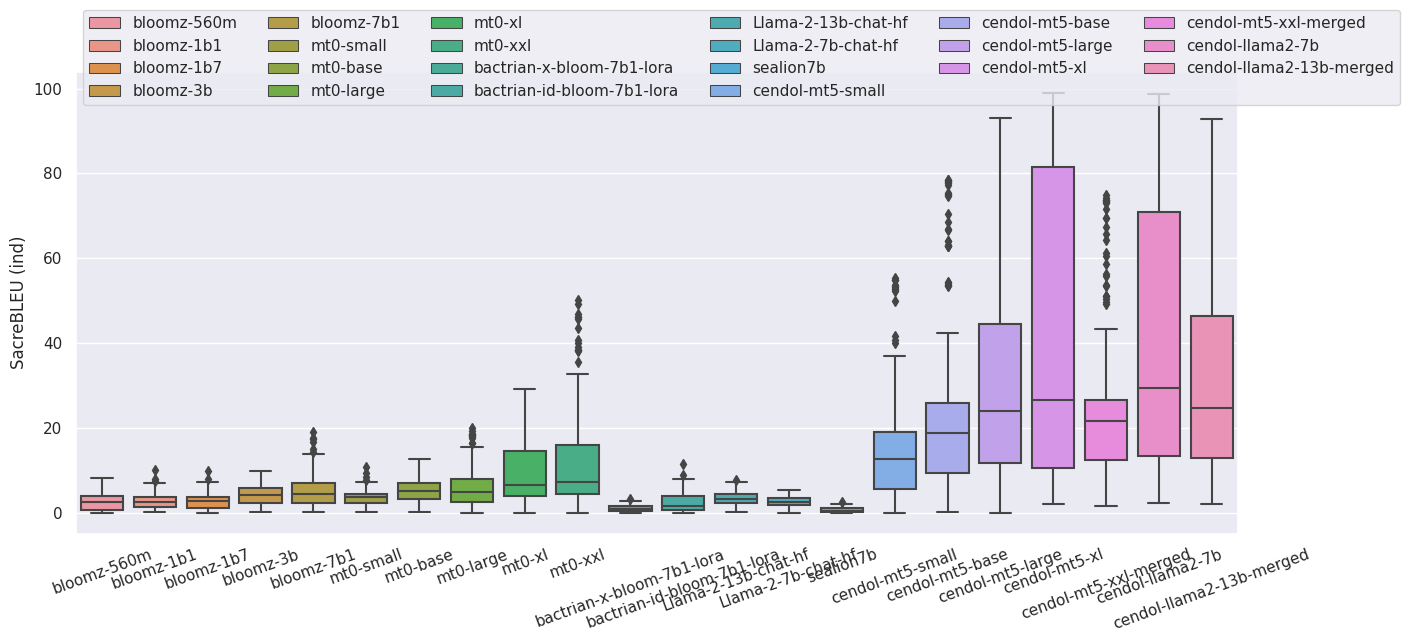

In [89]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (~pdf['dataset'].isin(['tydiqa_id_nusantara_qa'])) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('sacrebleu_qa_ind.pdf', bbox_inches='tight')
plt.show()

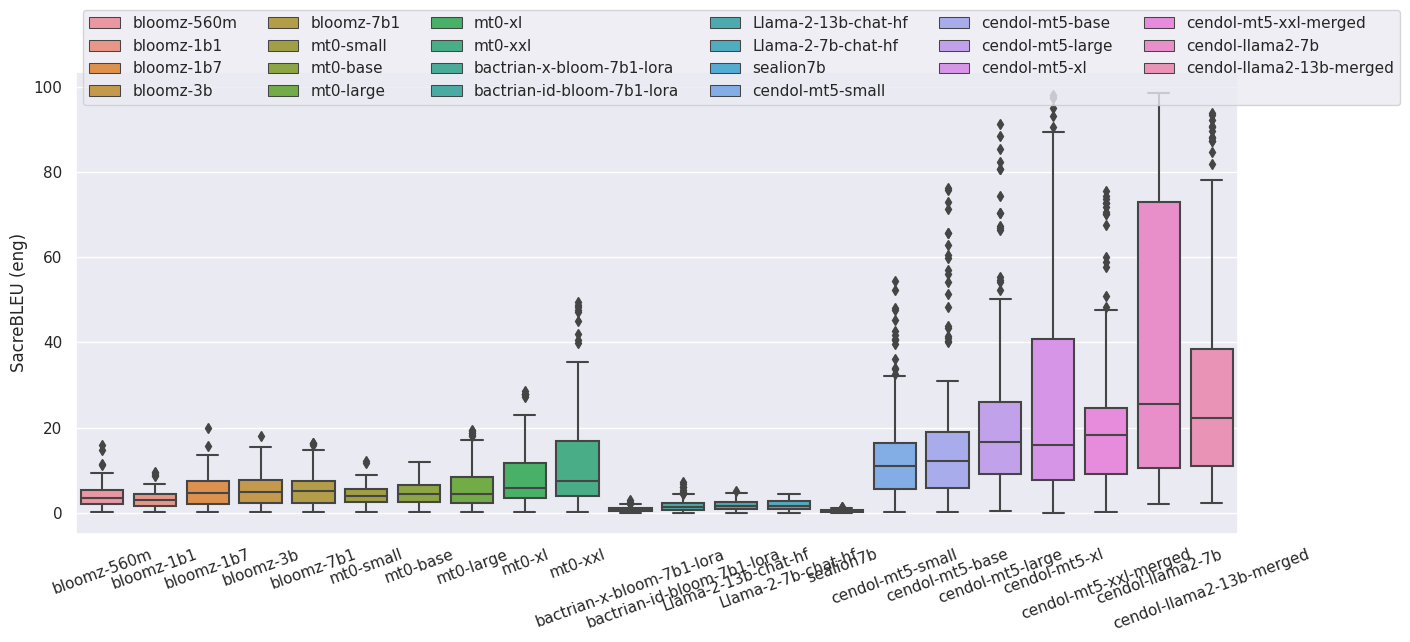

In [90]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (~pdf['dataset'].isin(['tydiqa_id_nusantara_qa'])) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('sacrebleu_qa_eng.pdf', bbox_inches='tight')
plt.show()

# Summarization

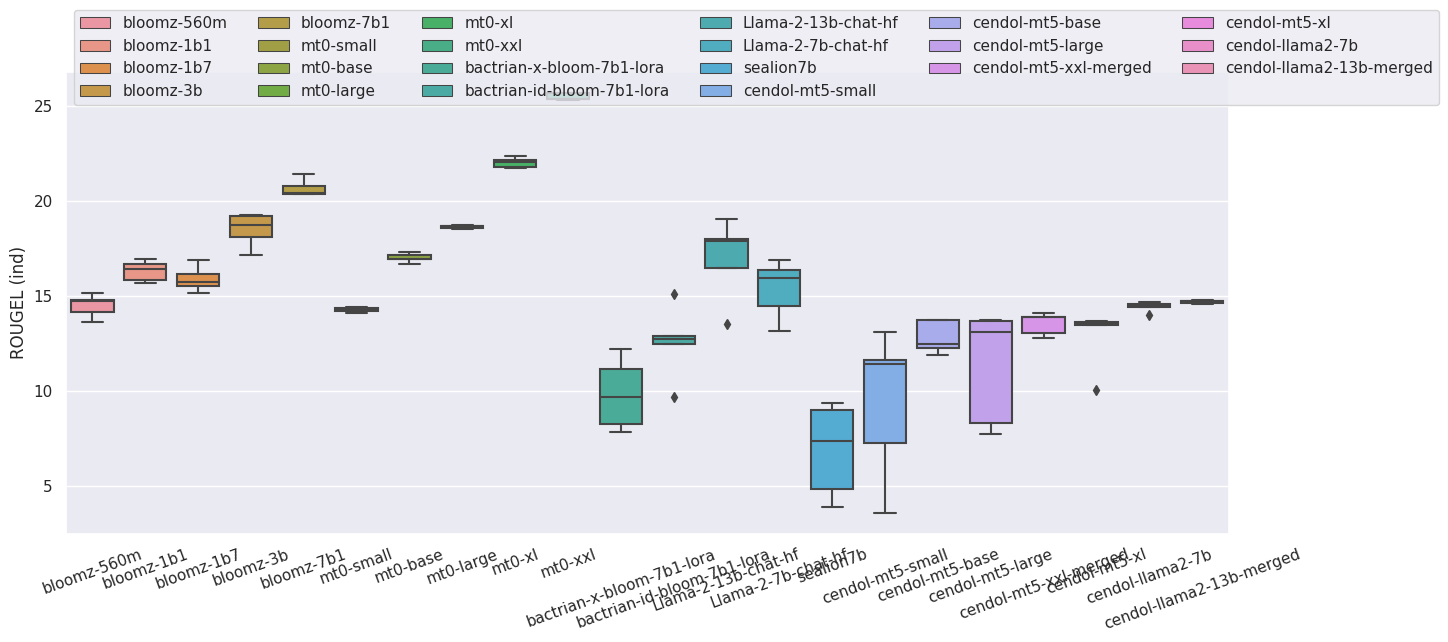

In [91]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL (ind)')
plt.xlabel(None)
plt.savefig('./figures/rougel_xlsum_ind.pdf', bbox_inches='tight')
plt.show()

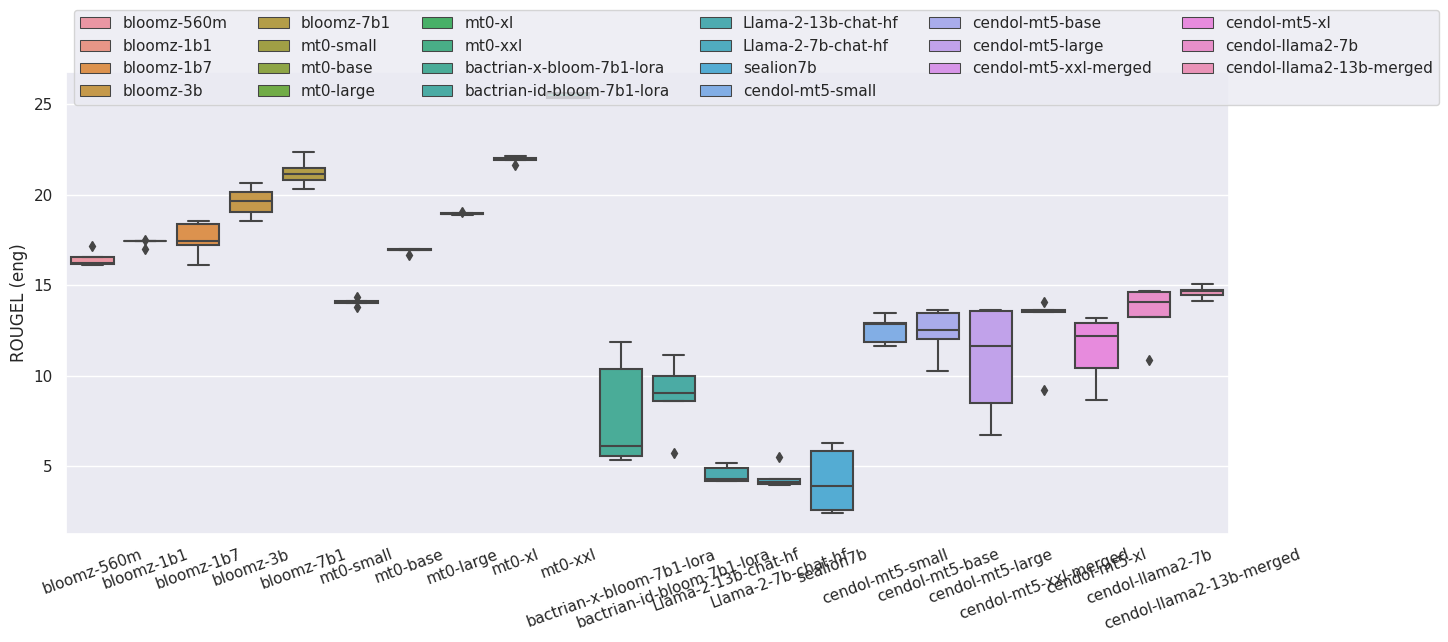

In [92]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'eng')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL (eng)')
plt.xlabel(None)
plt.savefig('./figures/rougel_xlsum_eng.pdf', bbox_inches='tight')
plt.show()

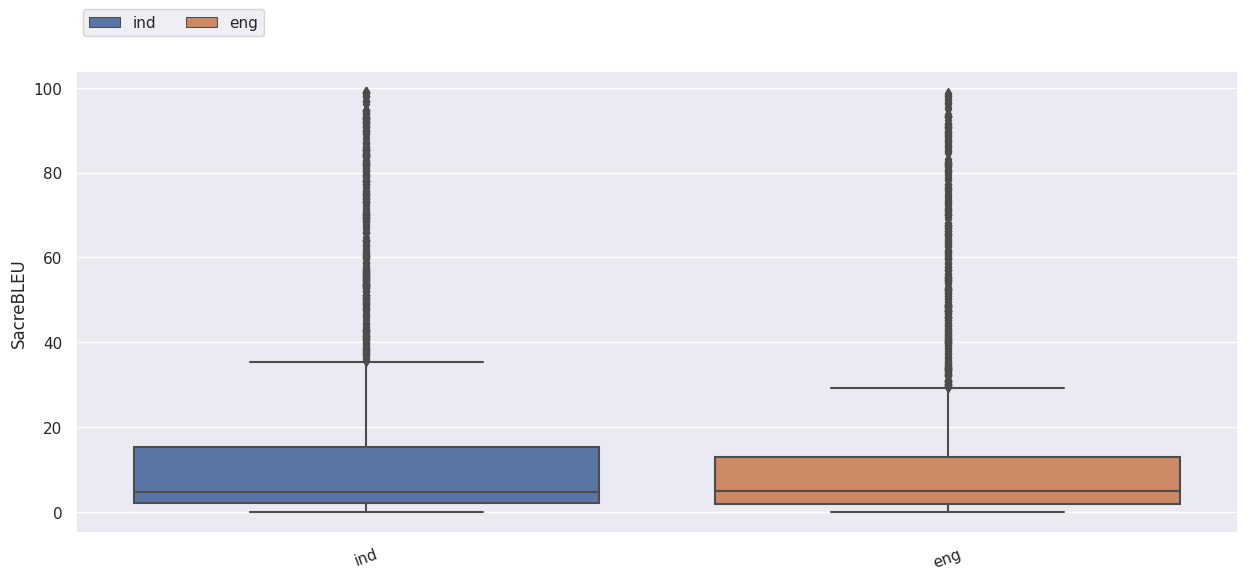

In [93]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='SacreBLEU', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.savefig('./figures/sacrebleu_lang.pdf', bbox_inches='tight')
plt.show()

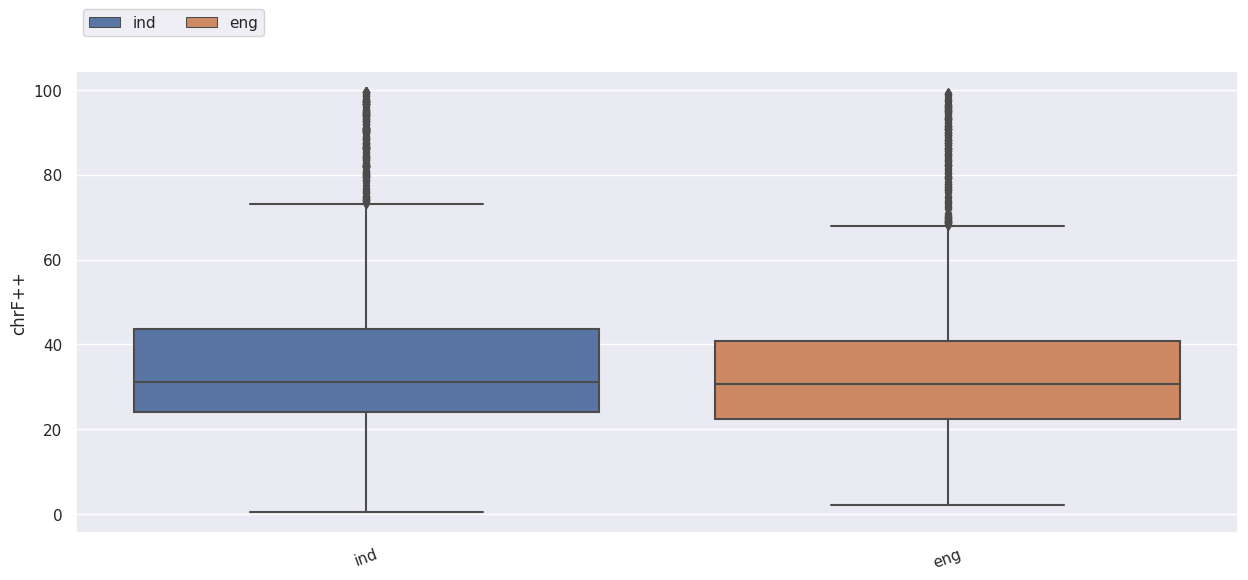

In [94]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='chrF++', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++')
plt.xlabel(None)
plt.savefig('./figures/chrf_lang.pdf', bbox_inches='tight')
plt.show()

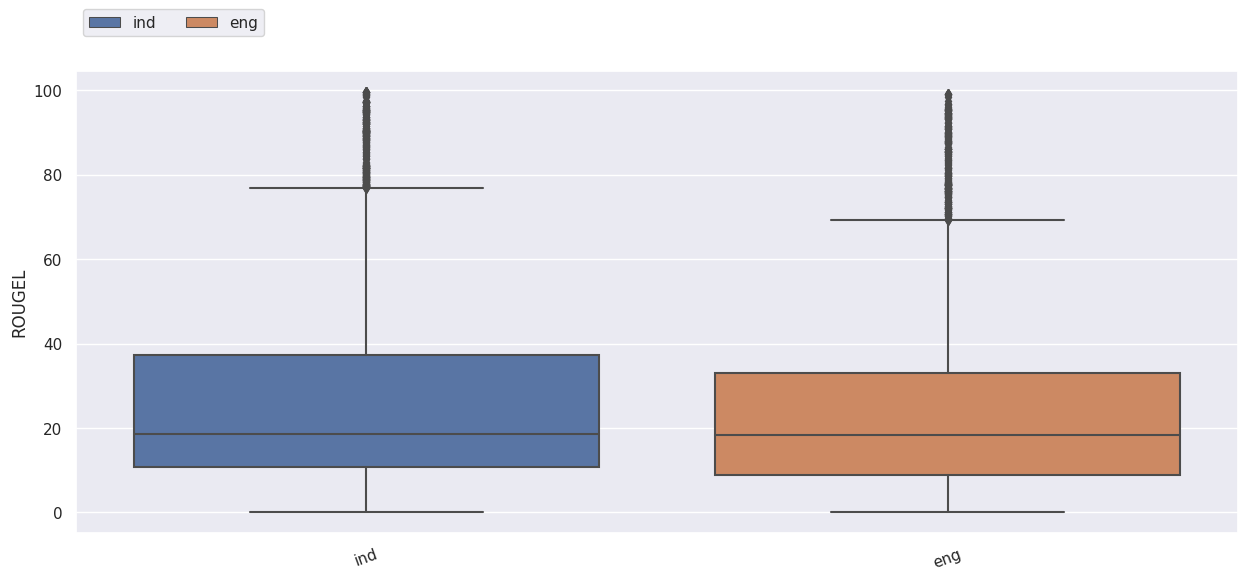

In [95]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='ROUGEL', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL')
plt.xlabel(None)
plt.savefig('./figures/rougel_lang.pdf', bbox_inches='tight')
plt.show()

# TEMP

In [3]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap

def make_cmap( colors ): 
    cmap = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in colors ] )
    return cmap

custom_cmap = make_cmap( ['#05a37e','#000000' ] ) 

/tmp/ipykernel_2865/1731637878.py:9: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f6407b6c820> starts with '_'. It is thus excluded from the legend.
  plt.legend(['_nolegend_', 'ChatGPT', 'GPT-4'], loc='upper right', fontsize=24, fancybox=True, framealpha=0.95)


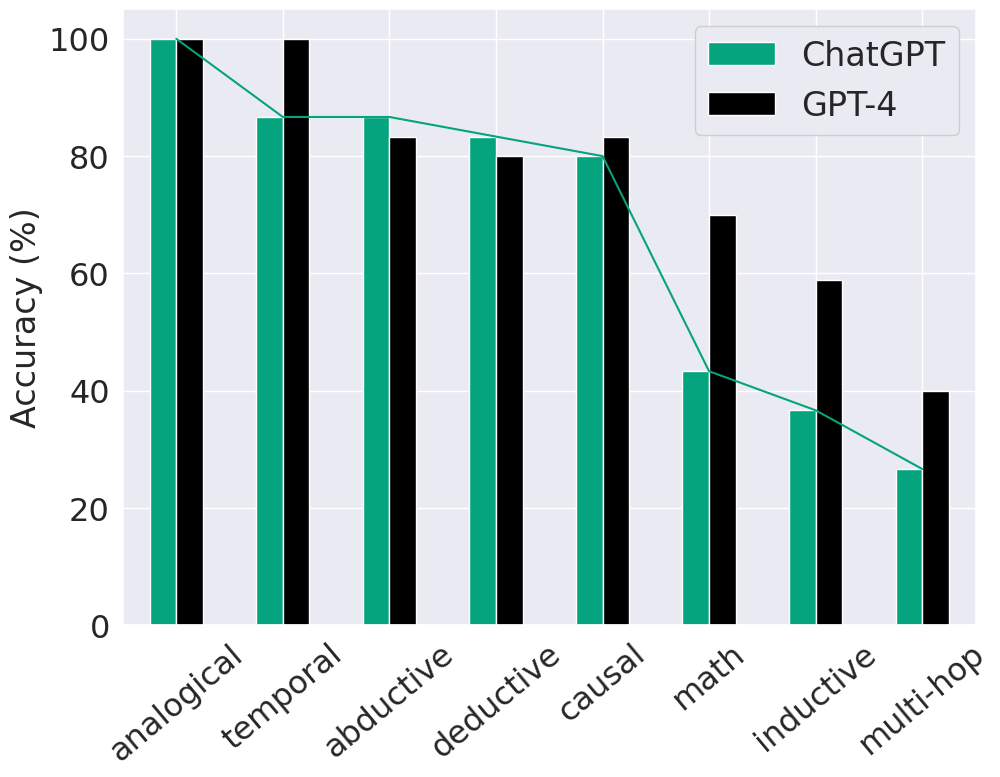

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
df = pd.read_csv('chatgpt.csv').dropna()
df['Reasoning Type'] = df['Reasoning Type'].apply(lambda x: x.replace(' ', '\n'))
ddf = (df.groupby('Reasoning Type')[['ChatGPT', 'GPT-4']].mean() * 100).sort_values(['ChatGPT', 'GPT-4'], ascending=False)

ax = ddf.plot(kind='bar', cmap=custom_cmap)
ddf[['ChatGPT']].plot(ax=ax, cmap=custom_cmap, legend=False)

plt.legend(['_nolegend_', 'ChatGPT', 'GPT-4'], loc='upper right', fontsize=24, fancybox=True, framealpha=0.95)
# plt.legend([ 'ChatGPT', 'GPT-4'], loc='upper left', fontsize=24, fancybox=True, framealpha=0.95)

plt.ylabel('Accuracy (%)', fontsize=24)
plt.xlabel('', fontsize=1)
plt.xticks(fontsize=23, rotation=40)
plt.yticks(fontsize=23)
plt.ylim(0,105)
plt.savefig('reasoning_results.png', bbox_inches='tight')

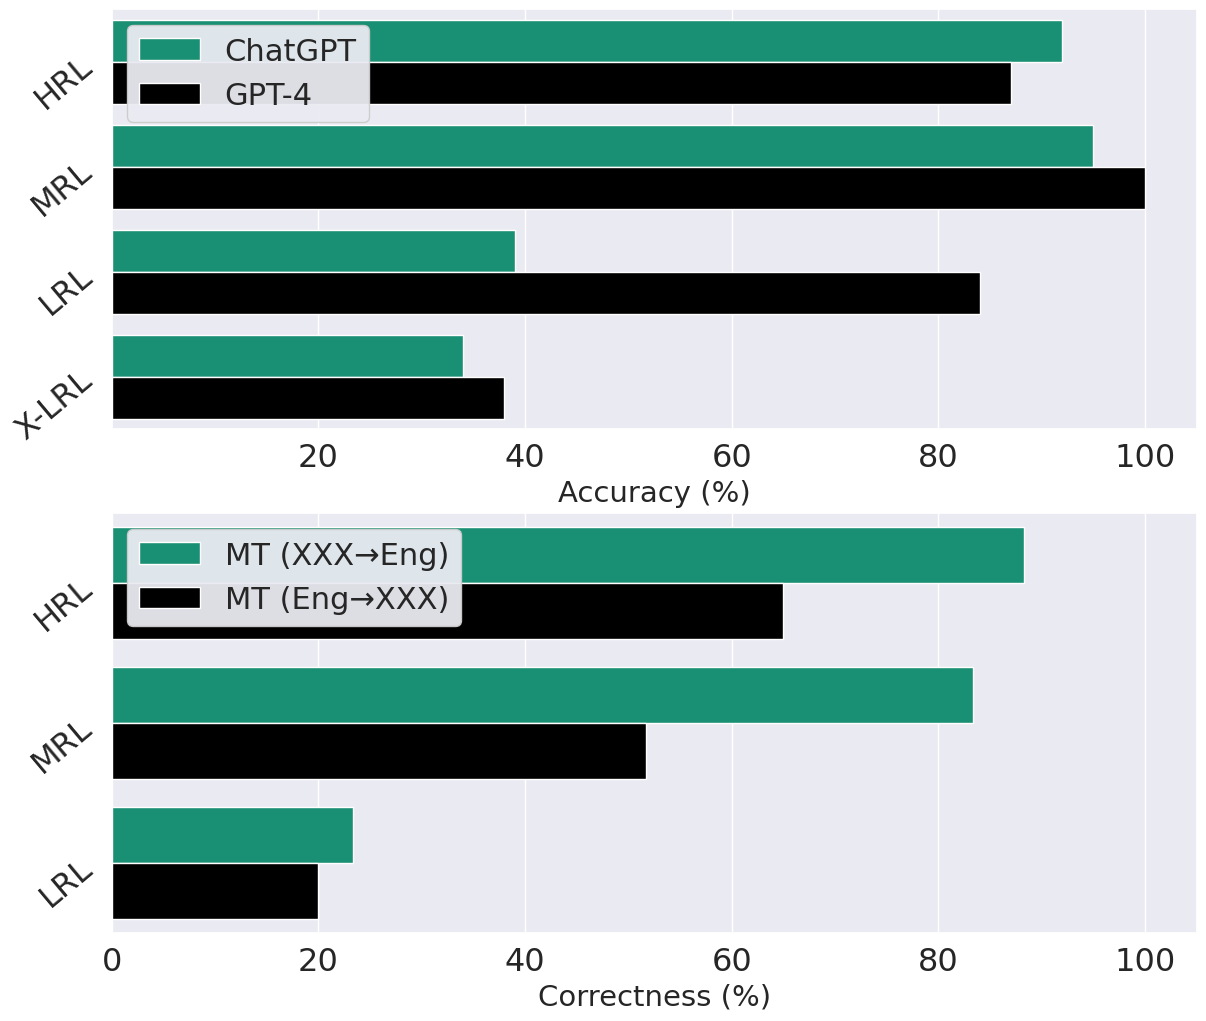

In [77]:
sns.set(rc={'figure.figsize':(14,12)})
df = pd.read_csv('chatgpt-multi.csv').dropna()
df['Accuracy'] = df['Accuracy'] * 100

custom_palette = sns.color_palette(['#05a37e','#000000'])
fig, (ax1, ax2) = plt.subplots(2, 1)

sns.barplot(df[df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Model', ax=ax1, palette=custom_palette, errorbar=None)
ax1.set_xlabel('Accuracy (%)', fontsize=21)
ax1.set_ylabel('', fontsize=1)
ax1.set_yticks([0, 1, 2, 3], ['HRL', 'MRL', 'LRL', 'X-LRL'], fontsize=23, rotation=40)
ax1.set_xticks([20, 40, 60, 80, 100], [20, 40, 60, 80, 100], fontsize=23)

h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

sns.barplot(df[~df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Task', ax=ax2, palette=custom_palette)
plt.xlabel('Correctness (%)', fontsize=21)
plt.ylabel('', fontsize=1)
plt.yticks(fontsize=23, rotation=40)
plt.xticks(fontsize=23)

h, l = ax2.get_legend_handles_labels()
ax2.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

ax1.set_xlim(0,105)
ax2.set_xlim(0,105)

# plt.ylim(0,105)
plt.savefig('multilingual_results.png', bbox_inches='tight')

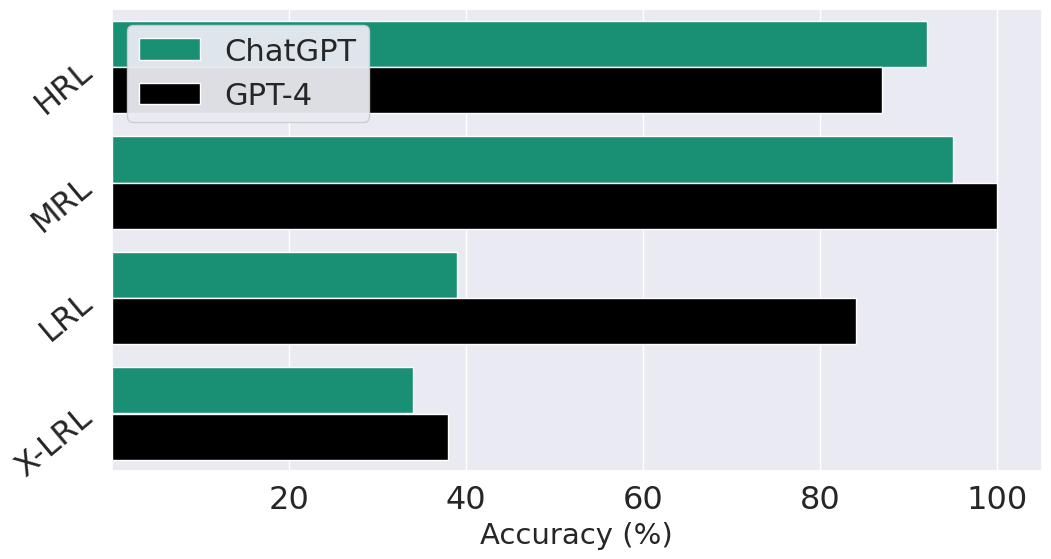

In [85]:
sns.set(rc={'figure.figsize':(12,6)})
df = pd.read_csv('chatgpt-multi.csv').dropna()
df['Accuracy'] = df['Accuracy'] * 100

custom_palette = sns.color_palette(['#05a37e','#000000'])

ax = sns.barplot(df[df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Model', palette=custom_palette, errorbar=None)
ax.set_xlabel('Accuracy (%)', fontsize=21)
ax.set_ylabel('', fontsize=1)
ax.set_yticks([0, 1, 2, 3], ['HRL', 'MRL', 'LRL', 'X-LRL'], fontsize=23, rotation=40)
ax.set_xticks([20, 40, 60, 80, 100], [20, 40, 60, 80, 100], fontsize=23)

h, l = ax.get_legend_handles_labels()
ax.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

# sns.barplot(df[~df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Task', ax=ax2, palette=custom_palette)
# plt.xlabel('Correctness (%)', fontsize=21)
# plt.ylabel('', fontsize=1)
# plt.yticks(fontsize=23, rotation=40)
# plt.xticks(fontsize=23)

# h, l = ax2.get_legend_handles_labels()
# ax2.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

# ax1.set_xlim(0,105)
# ax2.set_xlim(0,105)

# plt.ylim(0,105)
plt.savefig('multilingual_results.png', bbox_inches='tight')